In [ ]:
!nvidia-smi

Sat Dec  2 04:02:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/THESIS1/YOLOV8/YOLOV8-UPSAMPLED.zip -d .

Streaming output truncated to the last 5000 lines.
 extracting: ./Yolov8.upsampled/train/labels/skca_non_63_png.rf.8dc0016a54a24d25f45cbcbf8967c39d.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_63_png.rf.9f730f2a0ac34312971c0f52c82fa3c0.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_630_png.rf.6e649e8594e6c314855589db6beb56d4.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_630_png.rf.7f7089ce79c4888de4268d36a80a3877.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_630_png.rf.ef49472cec628acdec1881ec668eb40e.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_632_png.rf.524266a7feec302f61d2ab68fd091c74.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_632_png.rf.7cef7996713a02ba50cda53c237ef296.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_632_png.rf.e89f471f9a30f63193327a63ca281f4b.txt  
 extracting: ./Yolov8.upsampled/train/labels/skca_non_633_png.rf.1de2cb4d4075d4a3f57d6434a54806a8.txt  
 extracting: ./

In [ ]:
import ultralytics
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 31.3/166.8 GB disk)


In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import shutil

# Function for decision-based median filter
def decision_based_median_filter(image, threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a simple decision based on pixel intensity
    binary_mask = (gray > threshold).astype(np.uint8) * 250

    # Convert the binary mask to 3 channels to match the input image
    binary_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

    # Apply median filter only to the selected regions
    result = cv2.medianBlur(image, 3)  # You can adjust the kernel size as needed

    # Mask out regions where the decision was not met
    result = cv2.bitwise_and(result, binary_mask)

    return result

# Path to your dataset folder containing images and labels
dataset_folder = '/content/Yolov8.upsampled'

# Set the threshold for the decision-based filter
threshold = 100  # You can adjust this threshold value

# Output folder for filtered images and labels
output_folder = '/content/output'
os.makedirs(output_folder, exist_ok=True)

# Iterate through images in the dataset folder and its subfolders
for split_folder in ['train', 'valid', 'test']:
    split_folder_path = os.path.join(dataset_folder, split_folder)

    for root, dirs, files in os.walk(split_folder_path):
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Load the image
                image_path = os.path.join(root, filename)
                img = cv2.imread(image_path)

                # Apply the decision-based median filter
                filtered_img = decision_based_median_filter(img, threshold)

                # Save the result to the output folder
                relative_path = os.path.relpath(image_path, dataset_folder)
                output_path = os.path.join(output_folder, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, filtered_img)

# Copy label files
source_base_path = "//content/Yolov8.upsampled"
output_base_path = "/content/output"

# List of folders to copy (test, train, valid)
folders_to_copy = ["test", "train", "valid"]

# Loop through each folder and copy labels
for folder in folders_to_copy:
    source_labels_path = os.path.join(source_base_path, folder, "labels")
    output_labels_path = os.path.join(output_base_path, folder, "labels")

    # Create destination folder if it doesn't exist
    os.makedirs(output_labels_path, exist_ok=True)

    # Loop through each file in the source directory and copy it individually
    for filename in os.listdir(source_labels_path):
        source_file_path = os.path.join(source_labels_path, filename)
        output_file_path = os.path.join(output_labels_path, filename)
        shutil.copy2(source_file_path, output_file_path)

print("Filtering and Label Copying Completed.")


# Display one of the filtered images
sample_image_filename = "/content/YOLOV8Dataset/test/images/clfa_shiplabel_385_png.rf.86237449570babf8e9df1b64cb0e9a54.jpg"  # Replace with the actual filename
sample_image_path = os.path.join(output_folder, sample_image_filename)

sample_image = cv2.imread(sample_image_path)

if sample_image is not None:
    cv2_imshow(sample_image)
else:
    print(f"Image not found: {sample_image_path}")


Filtering and Label Copying Completed.
Image not found: /content/YOLOV8Dataset/test/images/clfa_shiplabel_385_png.rf.86237449570babf8e9df1b64cb0e9a54.jpg


In [ ]:
from ultralytics import YOLO

# Initialize the YOLOv8 model with the checkpoint file
model = YOLO('yolov8m.pt')

# Specify the path to your data.yaml file after unzipping the archive
data_yaml_path = '/content/Yolov8.upsampled/data.yaml'

# Start training with your desired settings
model.train(data=data_yaml_path, epochs=20, imgsz=768, batch=8, patience=False, deterministic=False, close_mosaic=0, lrf=0.0, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, translate=0.0, scale=0.0, fliplr=0.0, weight_decay=0.0, momentum=0.0)
'''
0.811,0.585,0.841,0.631,0.857,0.651,0.864,0.667,0.864,0.673,0.867,0.677,0.868,0.682,0.868,0.692,0.878,0.706,0.885,0.71,0.883,0.709,0.876,0.705,0.88,0.713,0.881,0.717,0.874,0.708,0.88,0.714,0.878,0.712,0.875,0.71,0.875,0.711,0.876,0.712,,,,
'''


100%|██████████| 49.7M/49.7M [00:00<00:00, 390MB/s]


Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Yolov8.upsampled/data.yaml, epochs=20, patience=False, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 44.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 122MB/s]


AMP: checks passed ✅


train: Scanning /content/output/train/labels... 35991 images, 25249 backgrounds, 0 corrupt: 100%|██████████| 35991/35991 [00:23<00:00, 1512.44it/s]


train: New cache created: /content/output/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21180, len(boxes) = 28285. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/output/valid/labels... 1503 images, 1051 backgrounds, 0 corrupt: 100%|██████████| 1503/1503 [00:00<00:00, 1573.27it/s]

val: New cache created: /content/output/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 929, len(boxes) = 1211. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.0' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0), 83 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.93G      1.591       3.06      1.521          3        768: 100%|██████████| 4499/4499 [10:35<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:09<00:00, 10.11it/s]

                   all       1503       1211      0.775      0.748      0.773      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.05G      1.383      1.326      1.342         10        768: 100%|██████████| 4499/4499 [10:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 11.83it/s]

                   all       1503       1211      0.803      0.778      0.811       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.11G      1.314      1.201      1.288         19        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.68it/s]

                   all       1503       1211      0.798      0.835      0.829      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.06G      1.291      1.128      1.277          7        768: 100%|██████████| 4499/4499 [09:55<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.09it/s]

                   all       1503       1211      0.818      0.806      0.843      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.08G      1.246      1.093      1.242         26        768: 100%|██████████| 4499/4499 [09:54<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.40it/s]

                   all       1503       1211      0.804      0.825      0.839      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       5.1G      1.211      1.037      1.227          9        768: 100%|██████████| 4499/4499 [09:56<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 11.95it/s]

                   all       1503       1211      0.812      0.828      0.845      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.11G      1.197      1.012      1.222          5        768: 100%|██████████| 4499/4499 [09:56<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.02it/s]

                   all       1503       1211      0.805      0.834      0.836      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.09G      1.168     0.9701        1.2          2        768: 100%|██████████| 4499/4499 [09:54<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.59it/s]


                   all       1503       1211      0.808      0.838      0.852      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.03G      1.147      0.948      1.187          6        768: 100%|██████████| 4499/4499 [09:54<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.22it/s]

                   all       1503       1211      0.833      0.815      0.853      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.08G      1.118     0.9165      1.169          5        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.40it/s]

                   all       1503       1211      0.834      0.815      0.847      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.09G      1.082     0.8644      1.149          7        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.44it/s]

                   all       1503       1211      0.842      0.804      0.853      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.05G       1.07     0.8557      1.144          2        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.22it/s]


                   all       1503       1211      0.814      0.825      0.848      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.08G      1.046     0.8235      1.128         16        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.23it/s]

                   all       1503       1211      0.819      0.828      0.848      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.07G      1.035     0.8171      1.124          4        768: 100%|██████████| 4499/4499 [09:56<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.57it/s]

                   all       1503       1211      0.807      0.834      0.852      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.08G      1.008     0.7919      1.109          8        768: 100%|██████████| 4499/4499 [09:55<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.44it/s]

                   all       1503       1211      0.823      0.824      0.849      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       5.1G     0.9939     0.7739      1.102          6        768: 100%|██████████| 4499/4499 [09:55<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.49it/s]

                   all       1503       1211      0.805      0.841      0.844      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.04G     0.9703     0.7489      1.088         17        768: 100%|██████████| 4499/4499 [09:55<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.36it/s]

                   all       1503       1211      0.822      0.837       0.85      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.06G     0.9563     0.7463      1.085         18        768: 100%|██████████| 4499/4499 [09:58<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.31it/s]

                   all       1503       1211      0.816      0.836      0.846      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       5.1G     0.9369     0.7341      1.075         10        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.73it/s]

                   all       1503       1211      0.812      0.848      0.846       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.06G     0.9276     0.7061      1.067         12        768: 100%|██████████| 4499/4499 [09:57<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 12.17it/s]


                   all       1503       1211      0.806       0.86      0.845       0.66

20 epochs completed in 3.376 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:09<00:00, 10.14it/s]


                   all       1503       1211      0.823      0.836      0.849      0.666
               Barcode       1503        411       0.85      0.852      0.865      0.733
          BuyerDetails       1503        161      0.836       0.87      0.899      0.794
                  Face       1503        240      0.868      0.875      0.916      0.659
                QRCode       1503        206      0.824       0.82      0.827      0.672
            TrackingID       1503        193      0.736      0.765      0.741      0.472
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8ca66ff790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

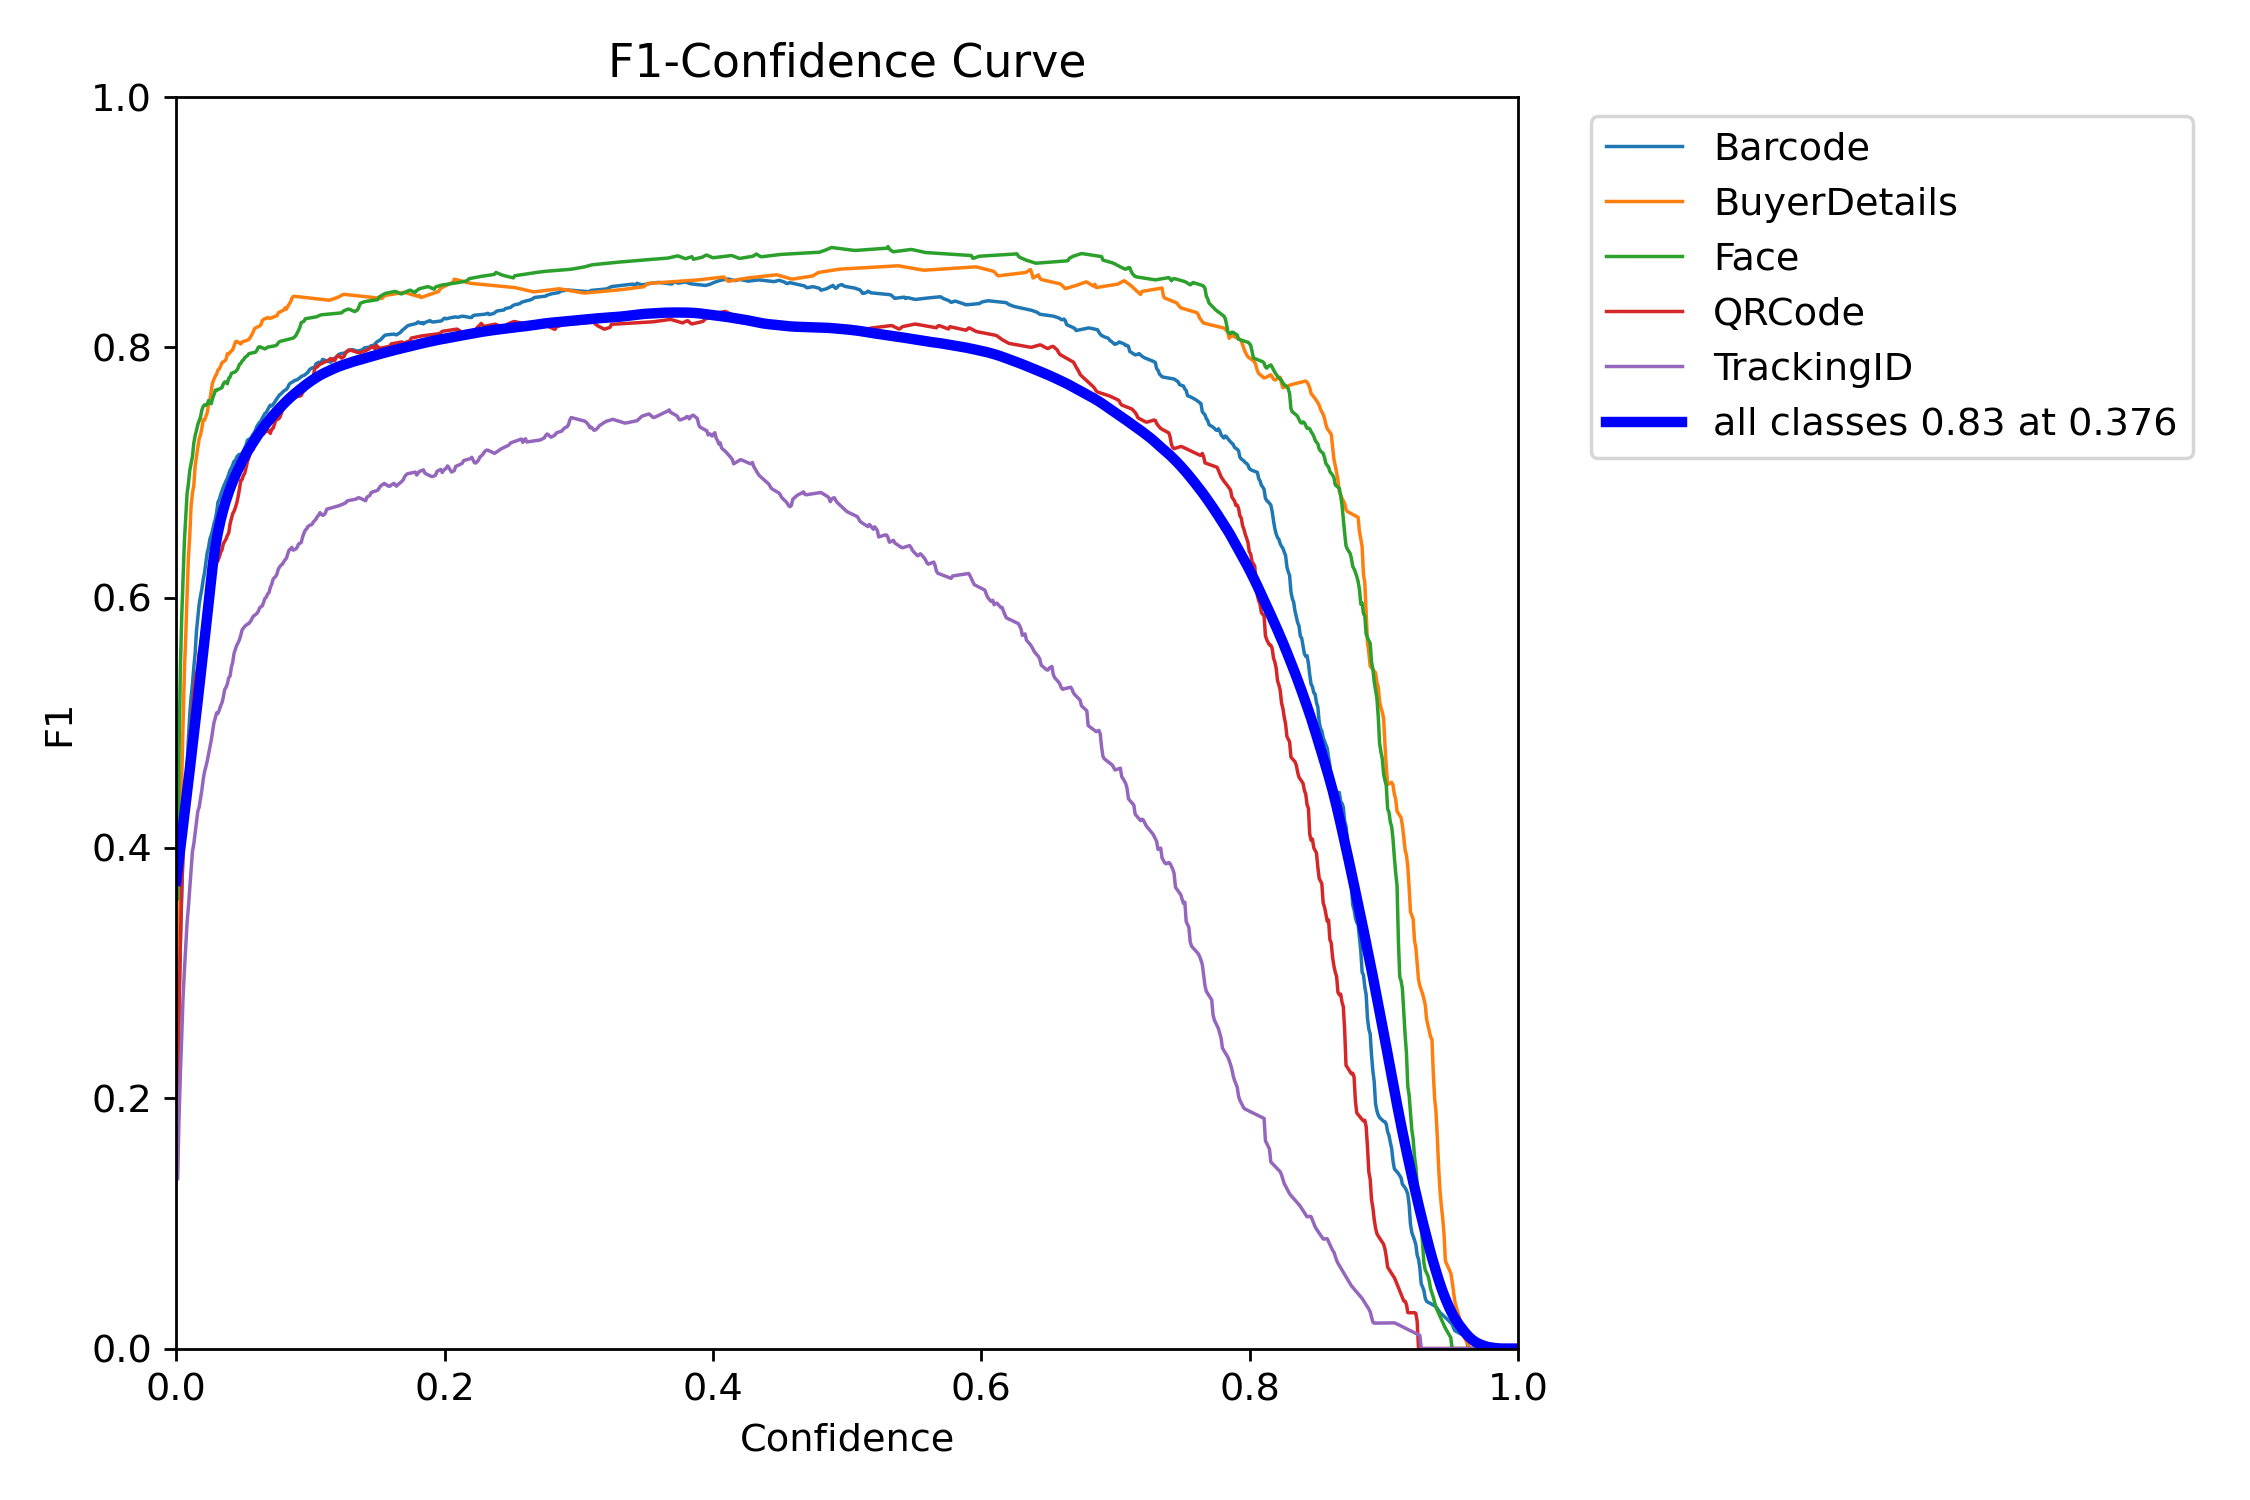

In [ ]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)

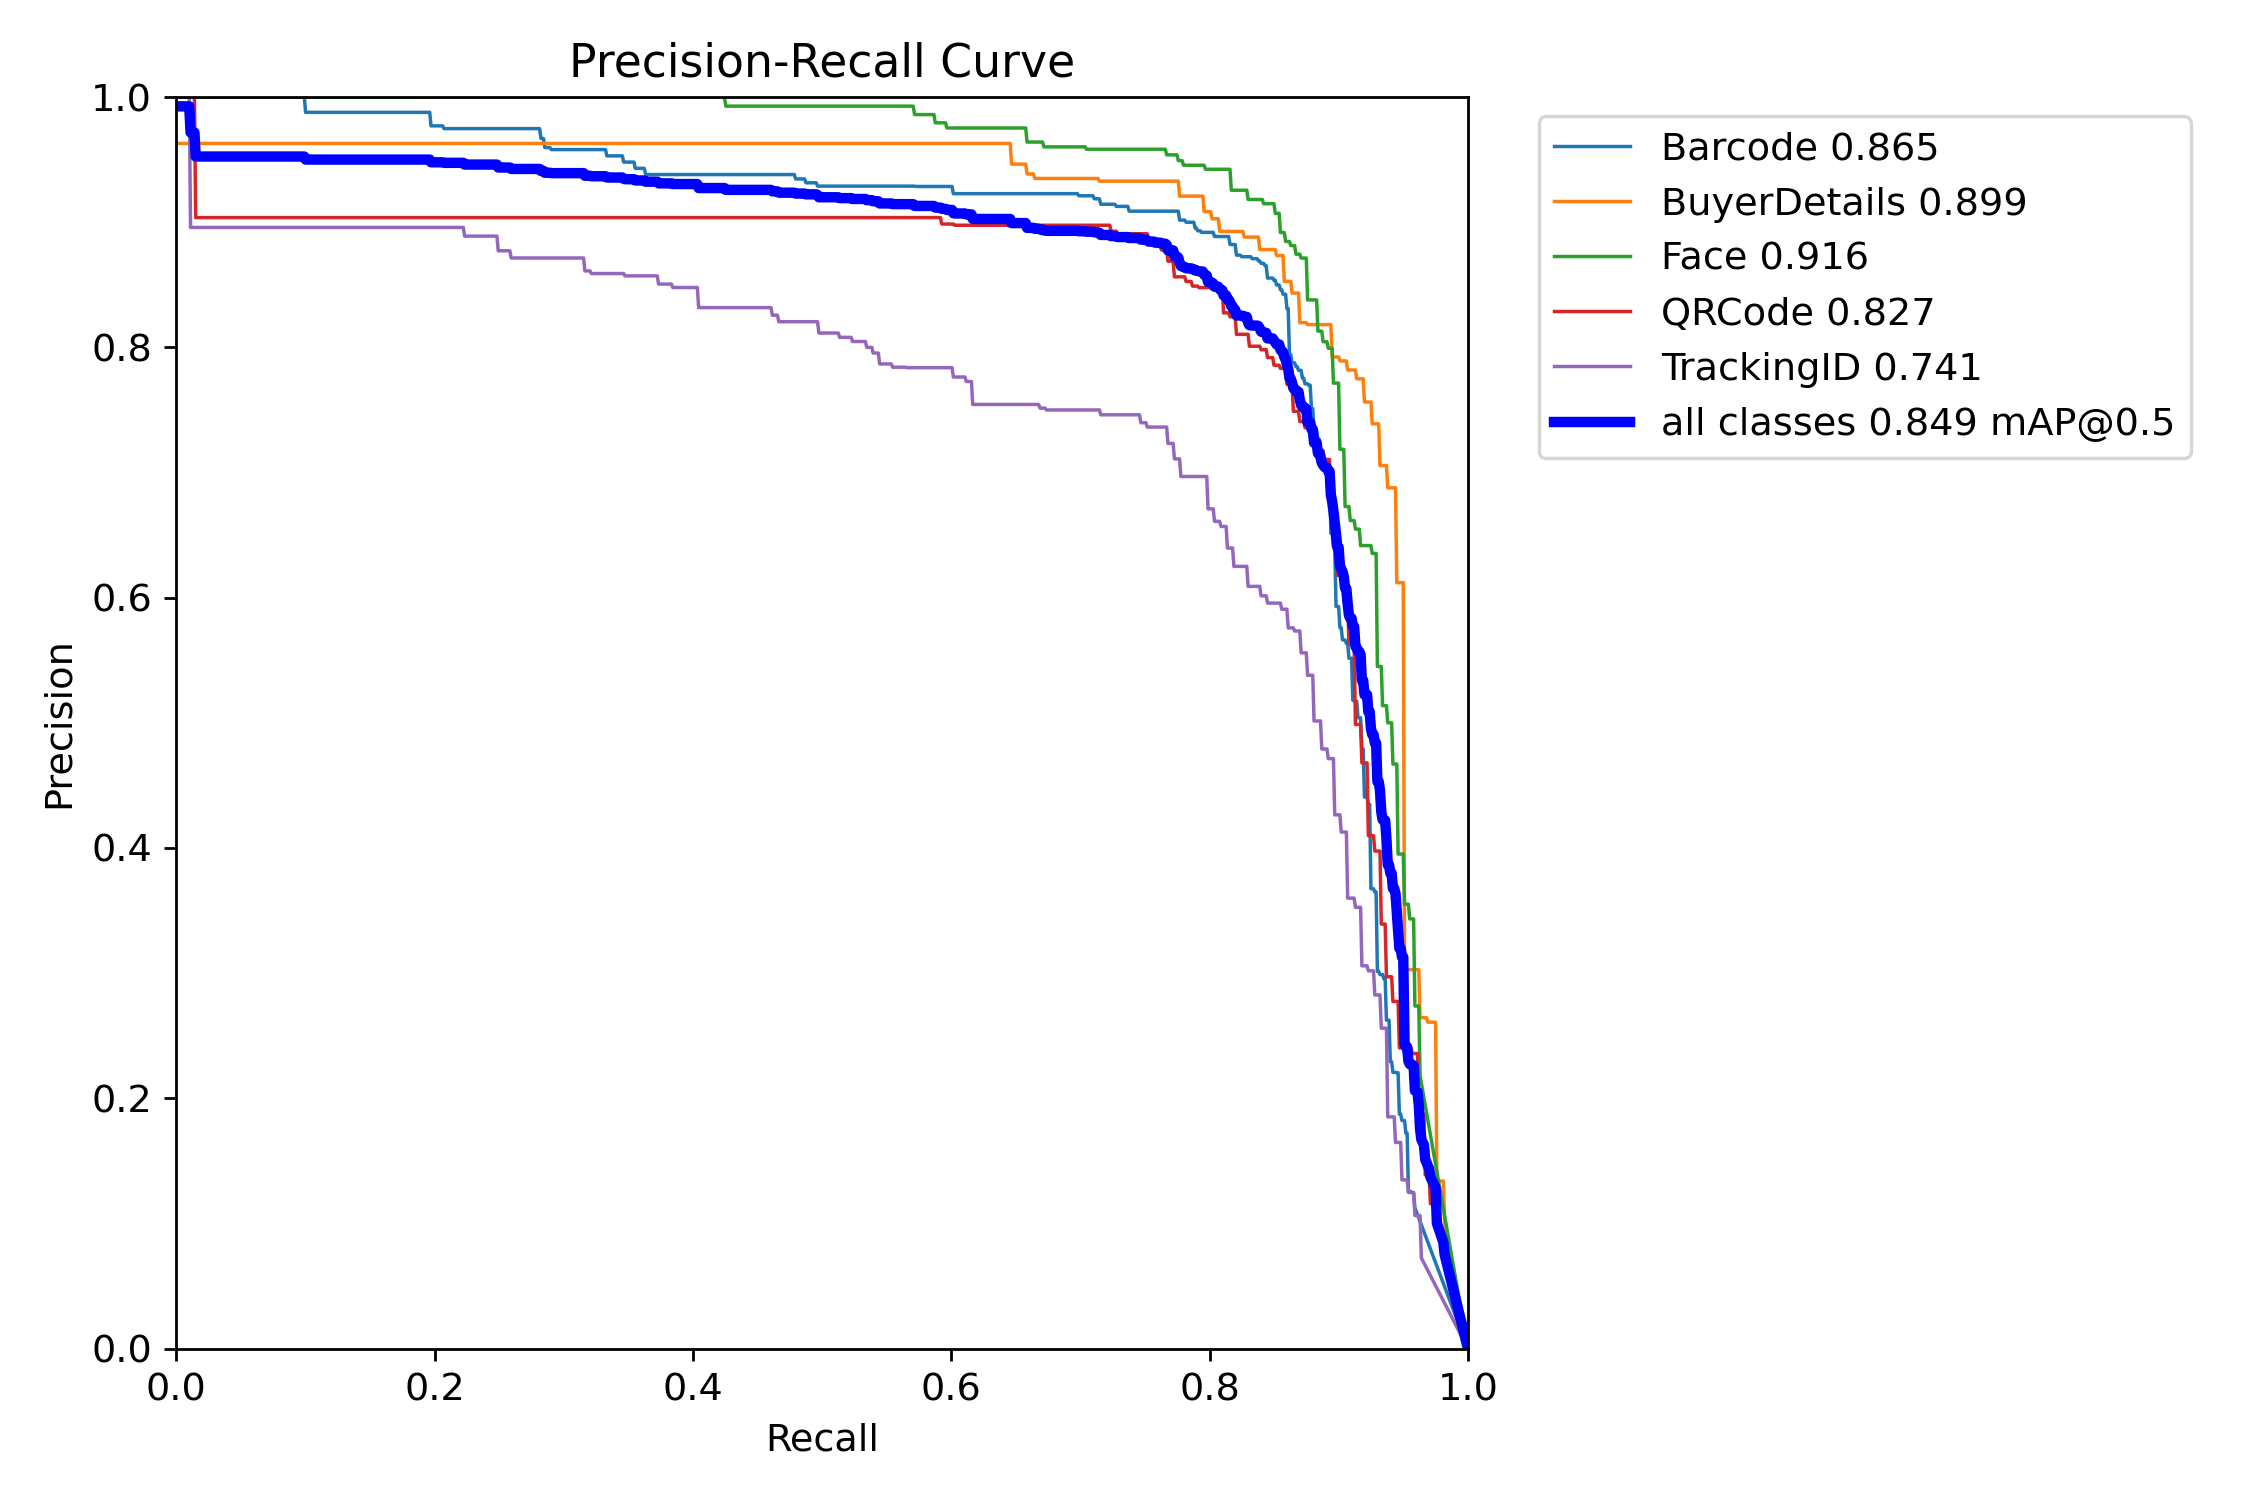

In [ ]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

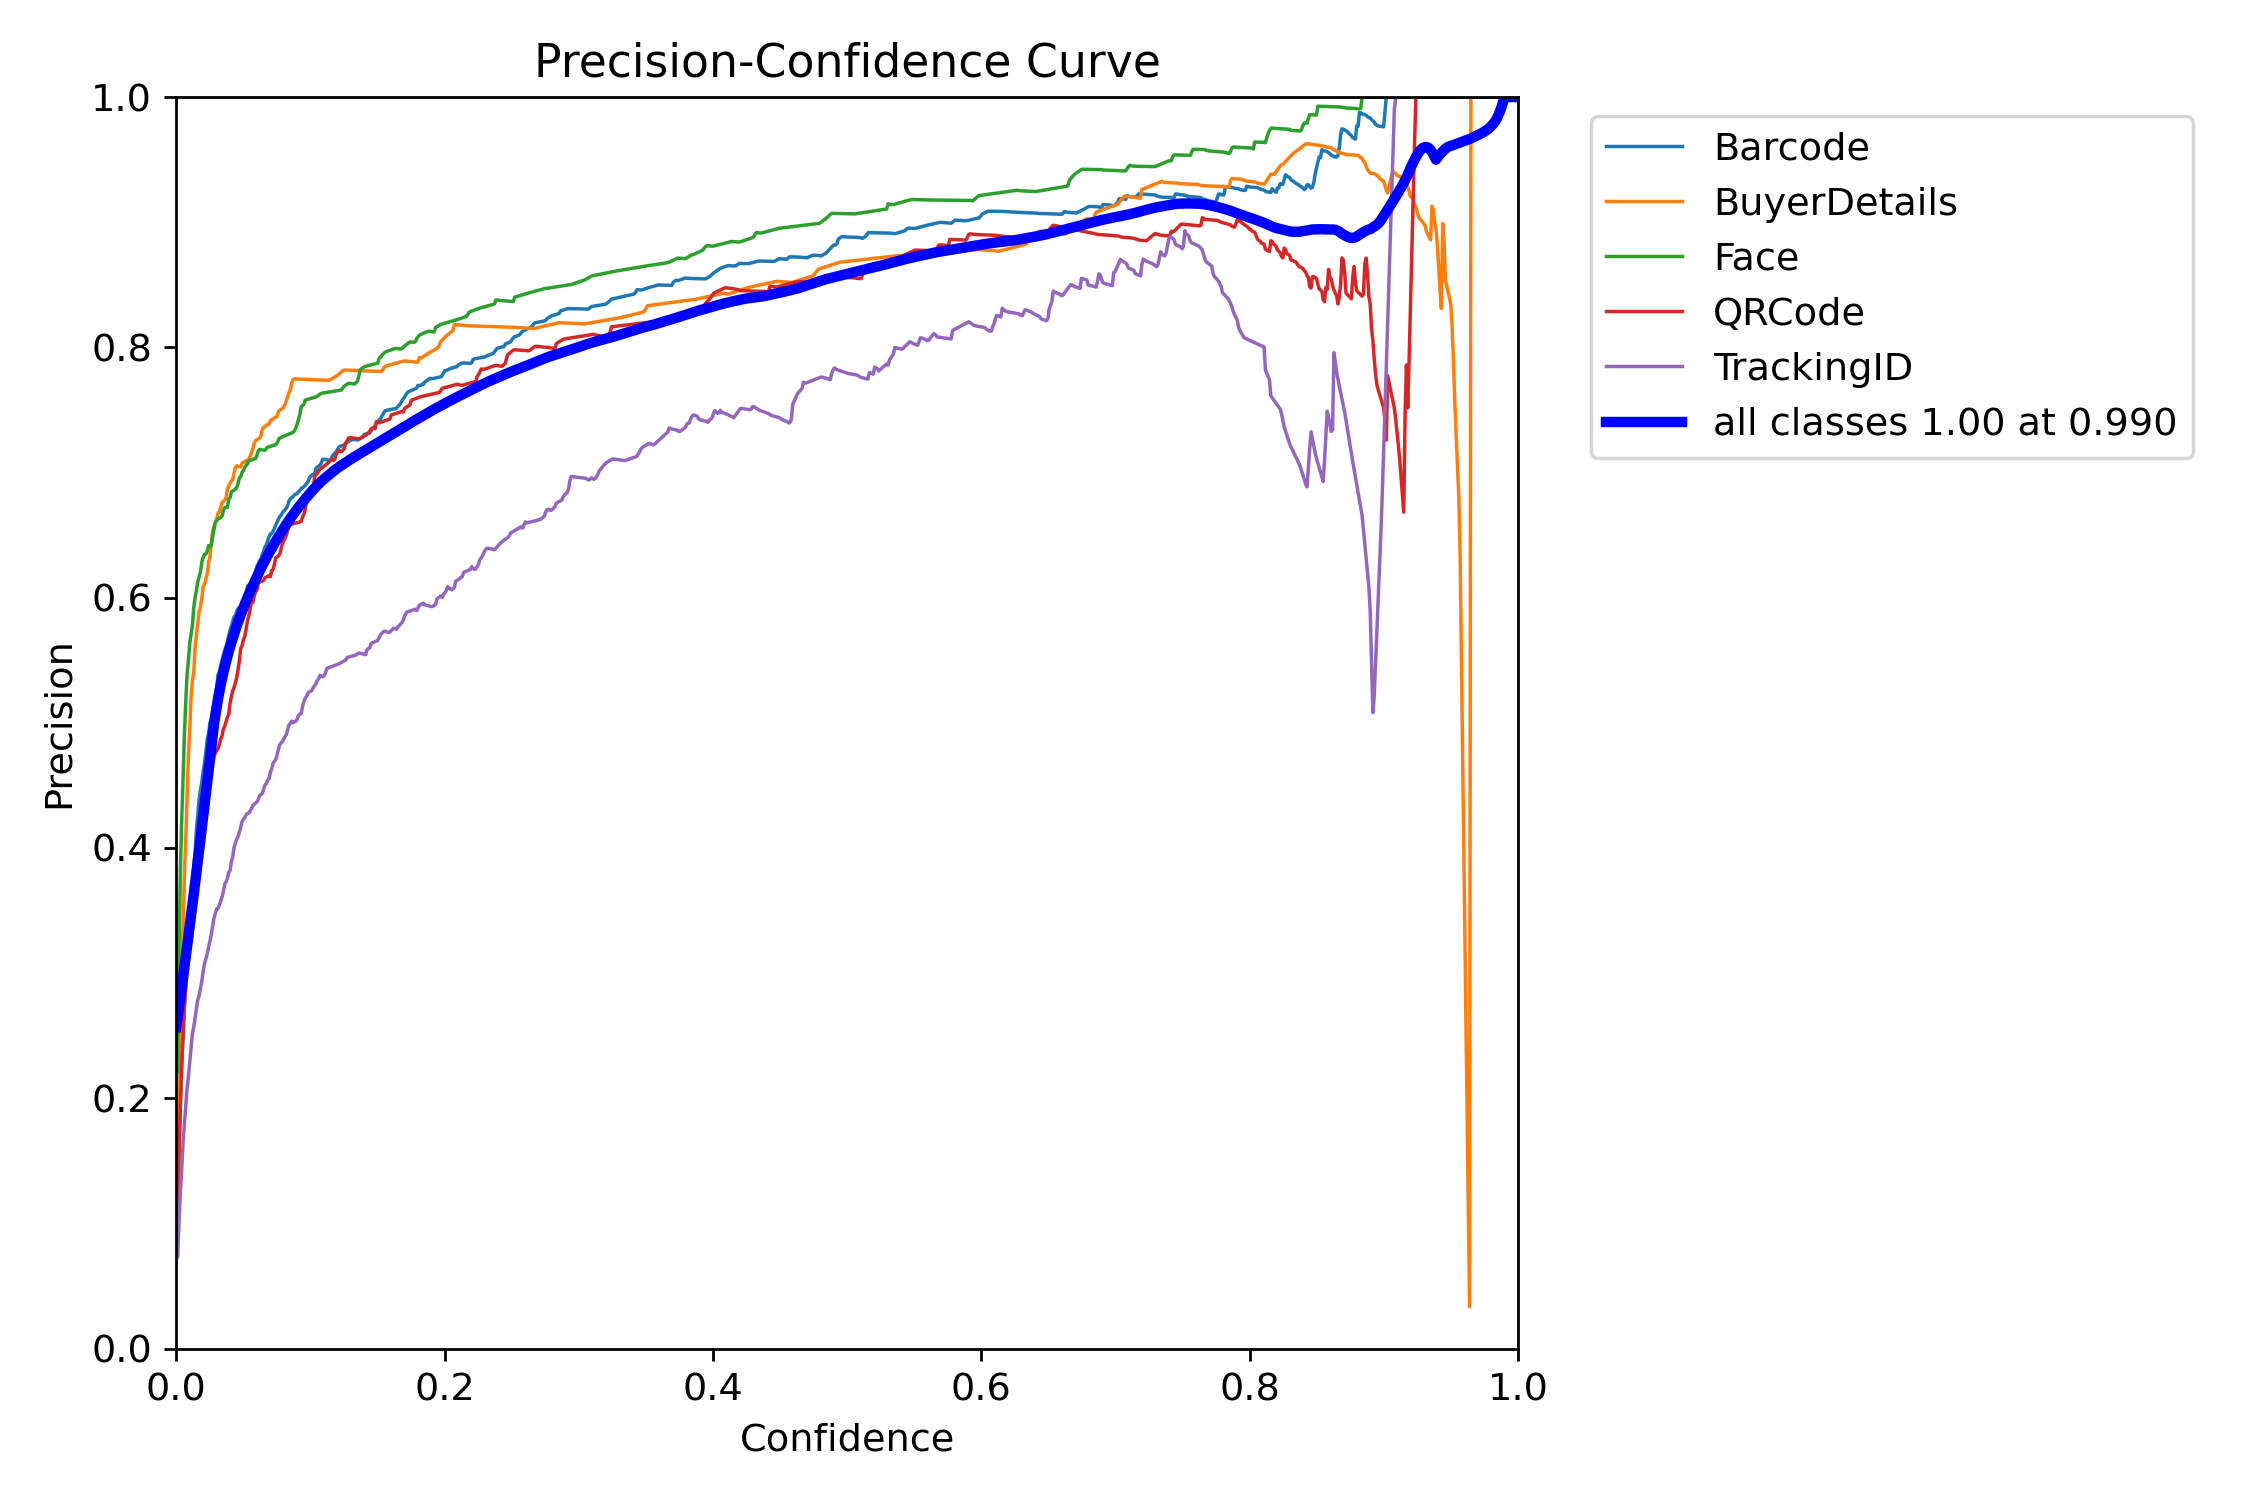

In [ ]:
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)

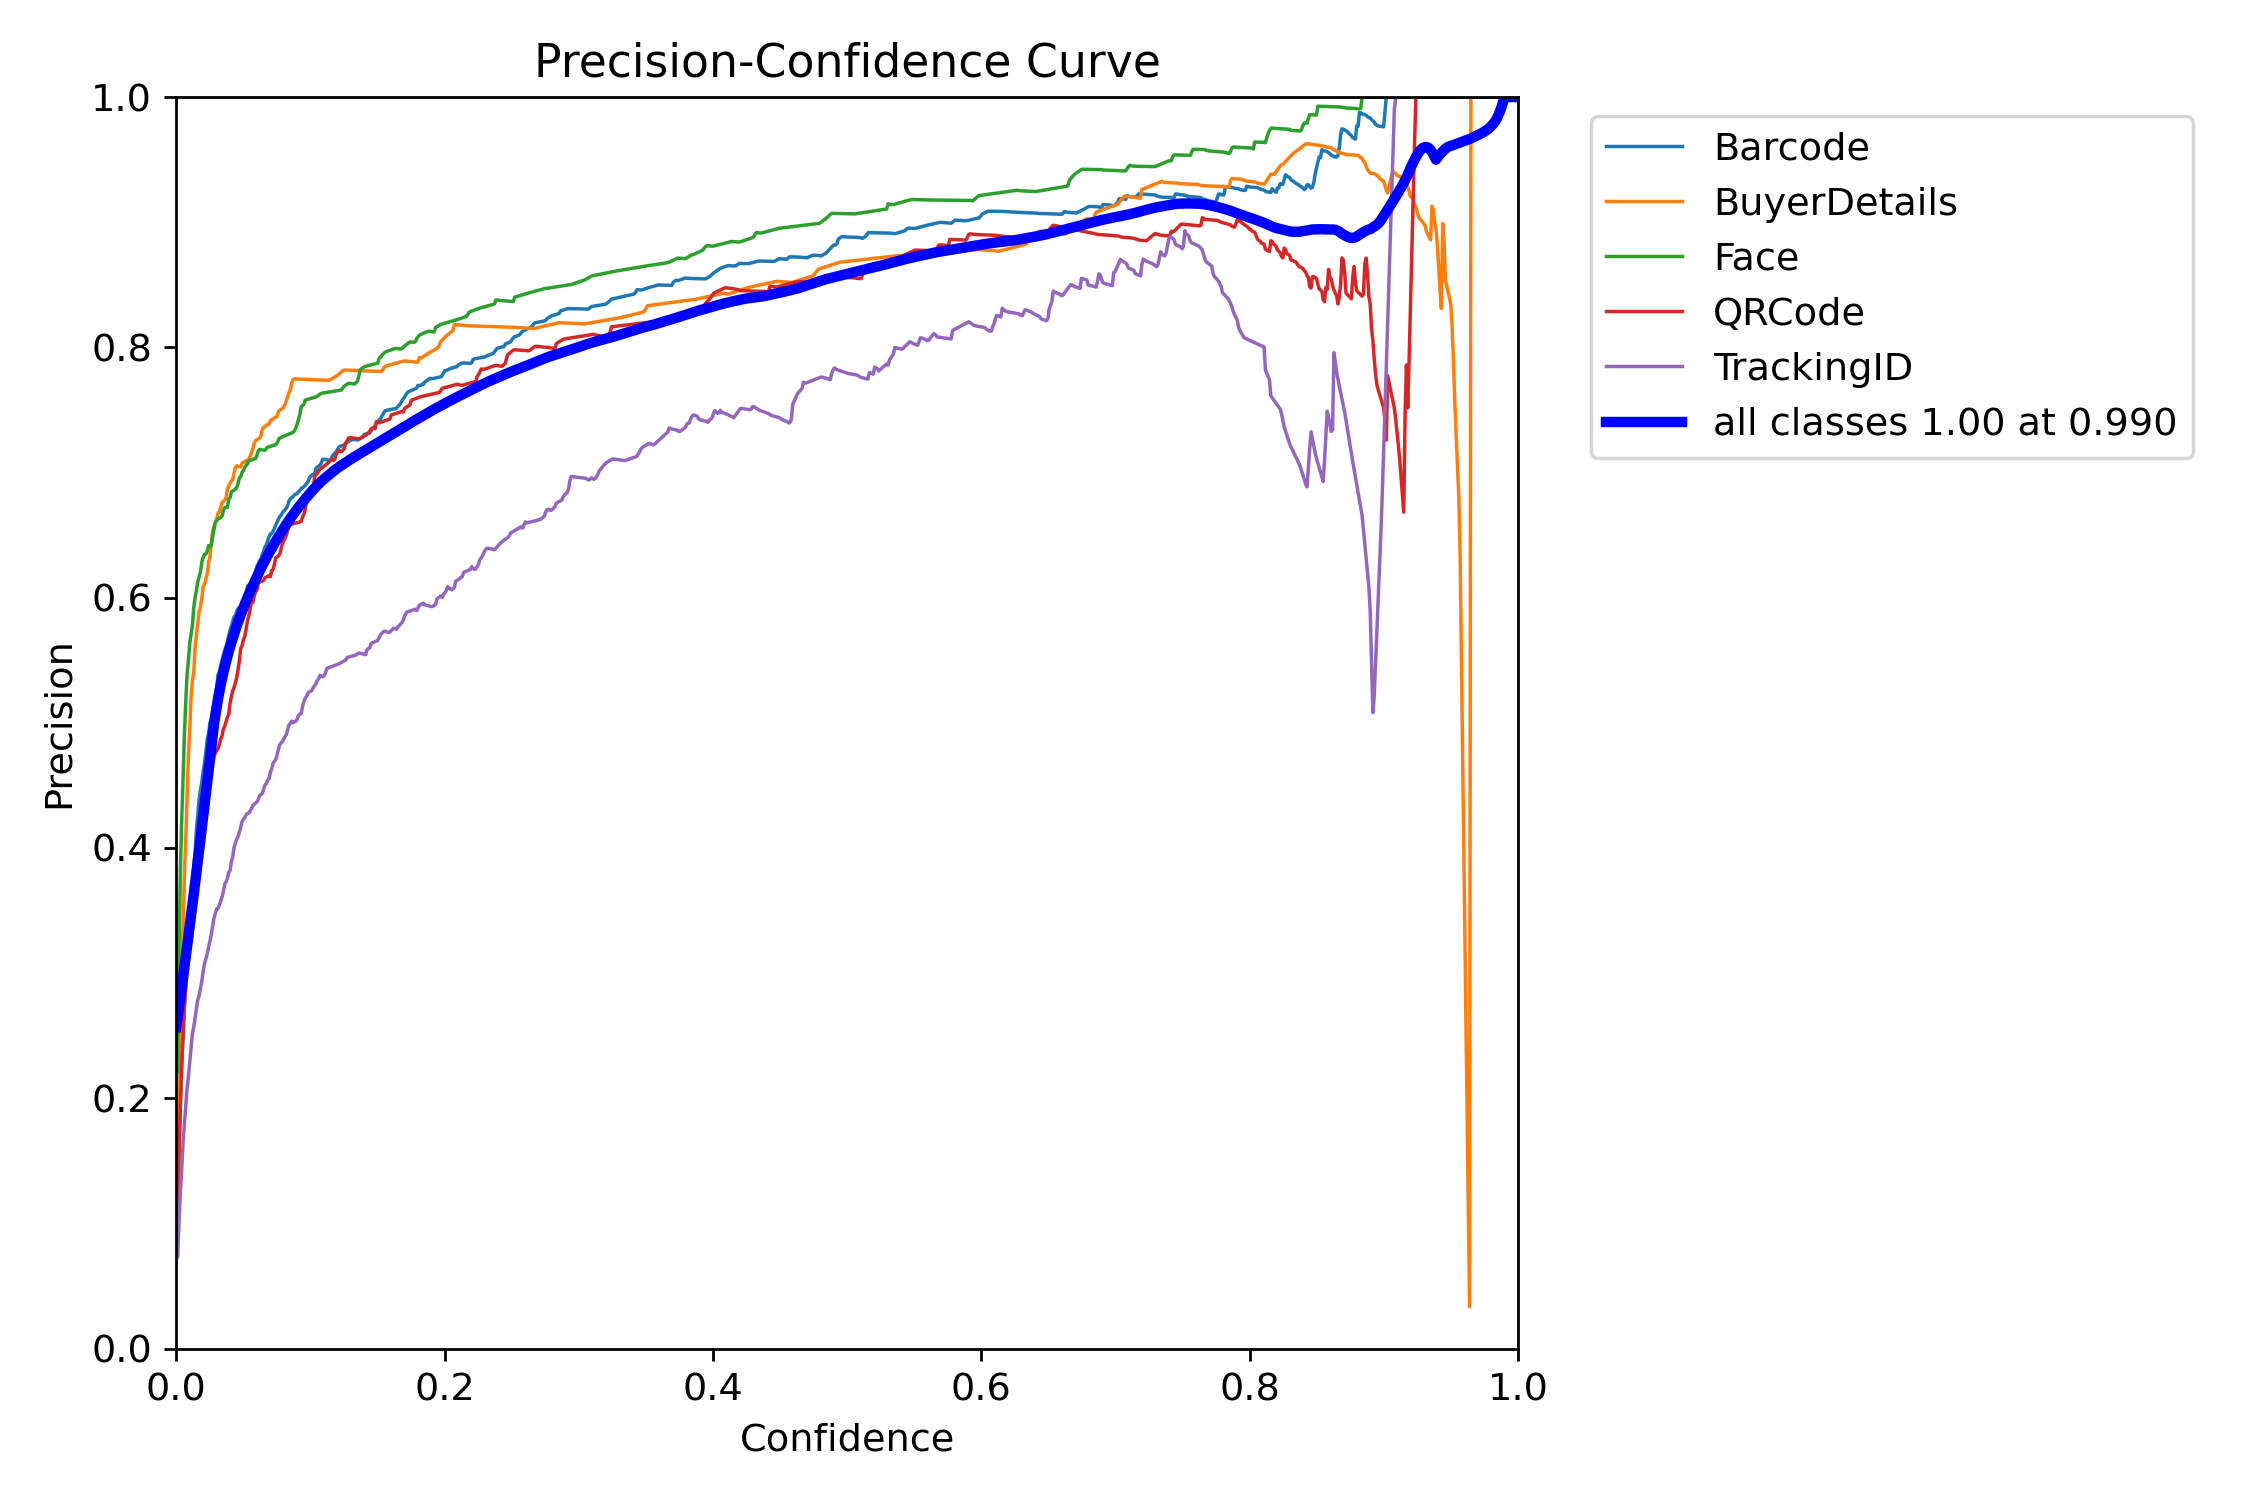

In [ ]:
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)

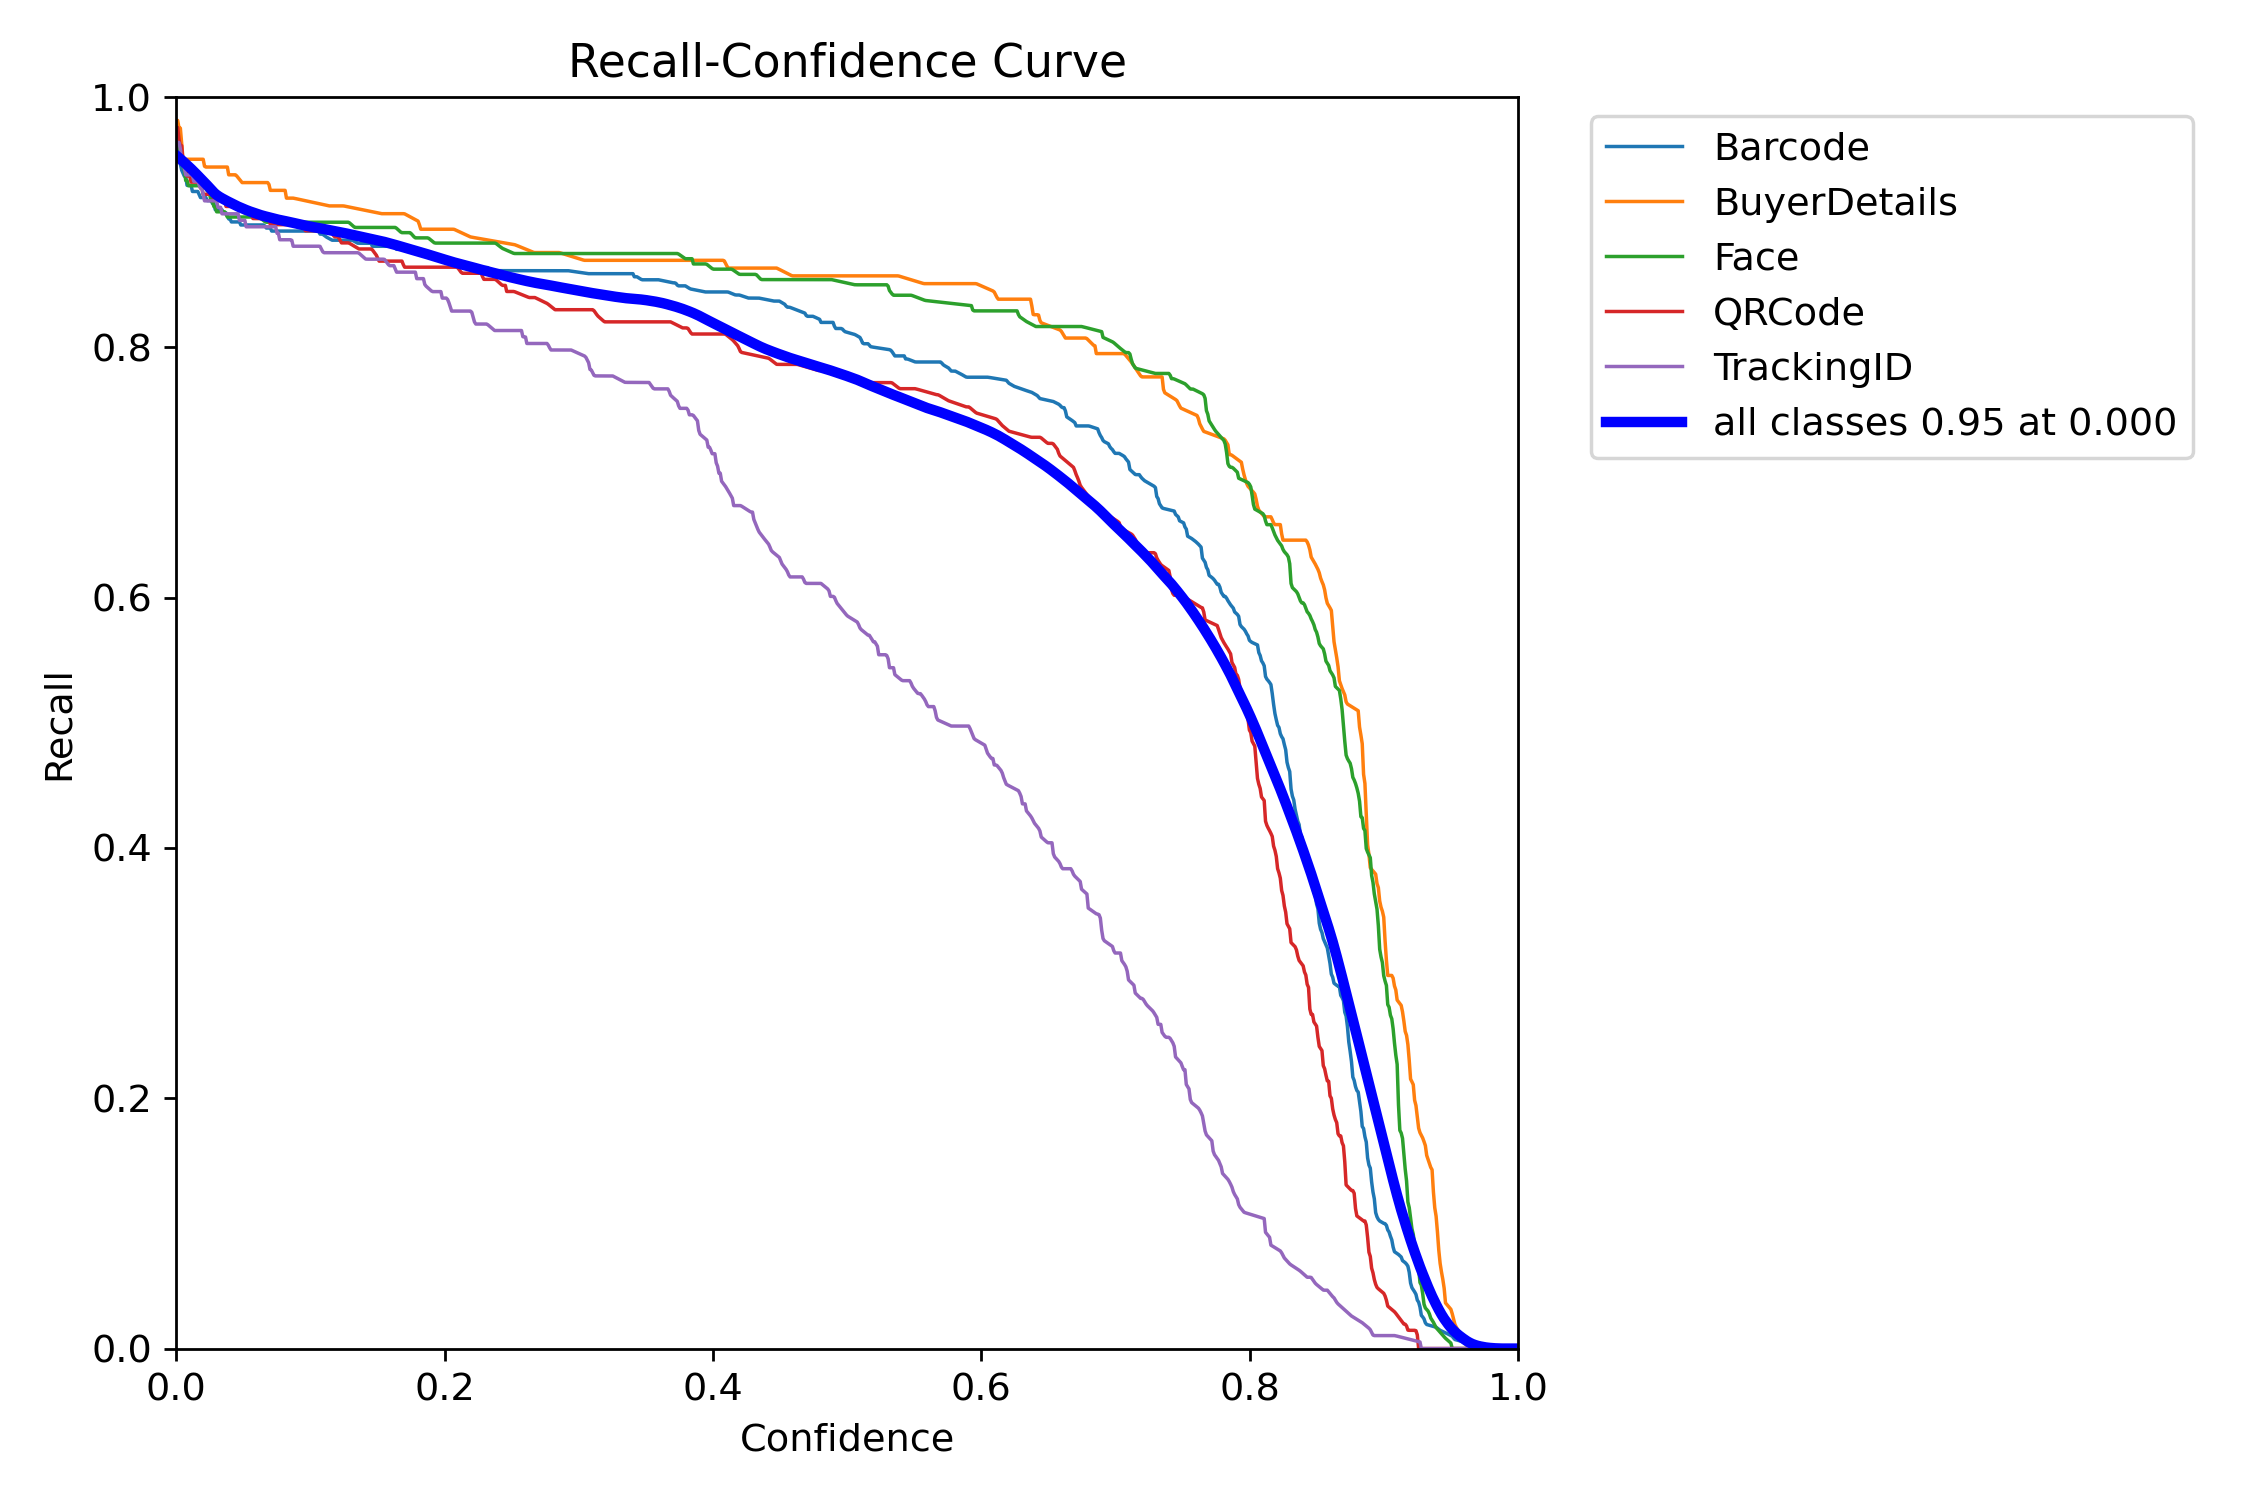

In [ ]:
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

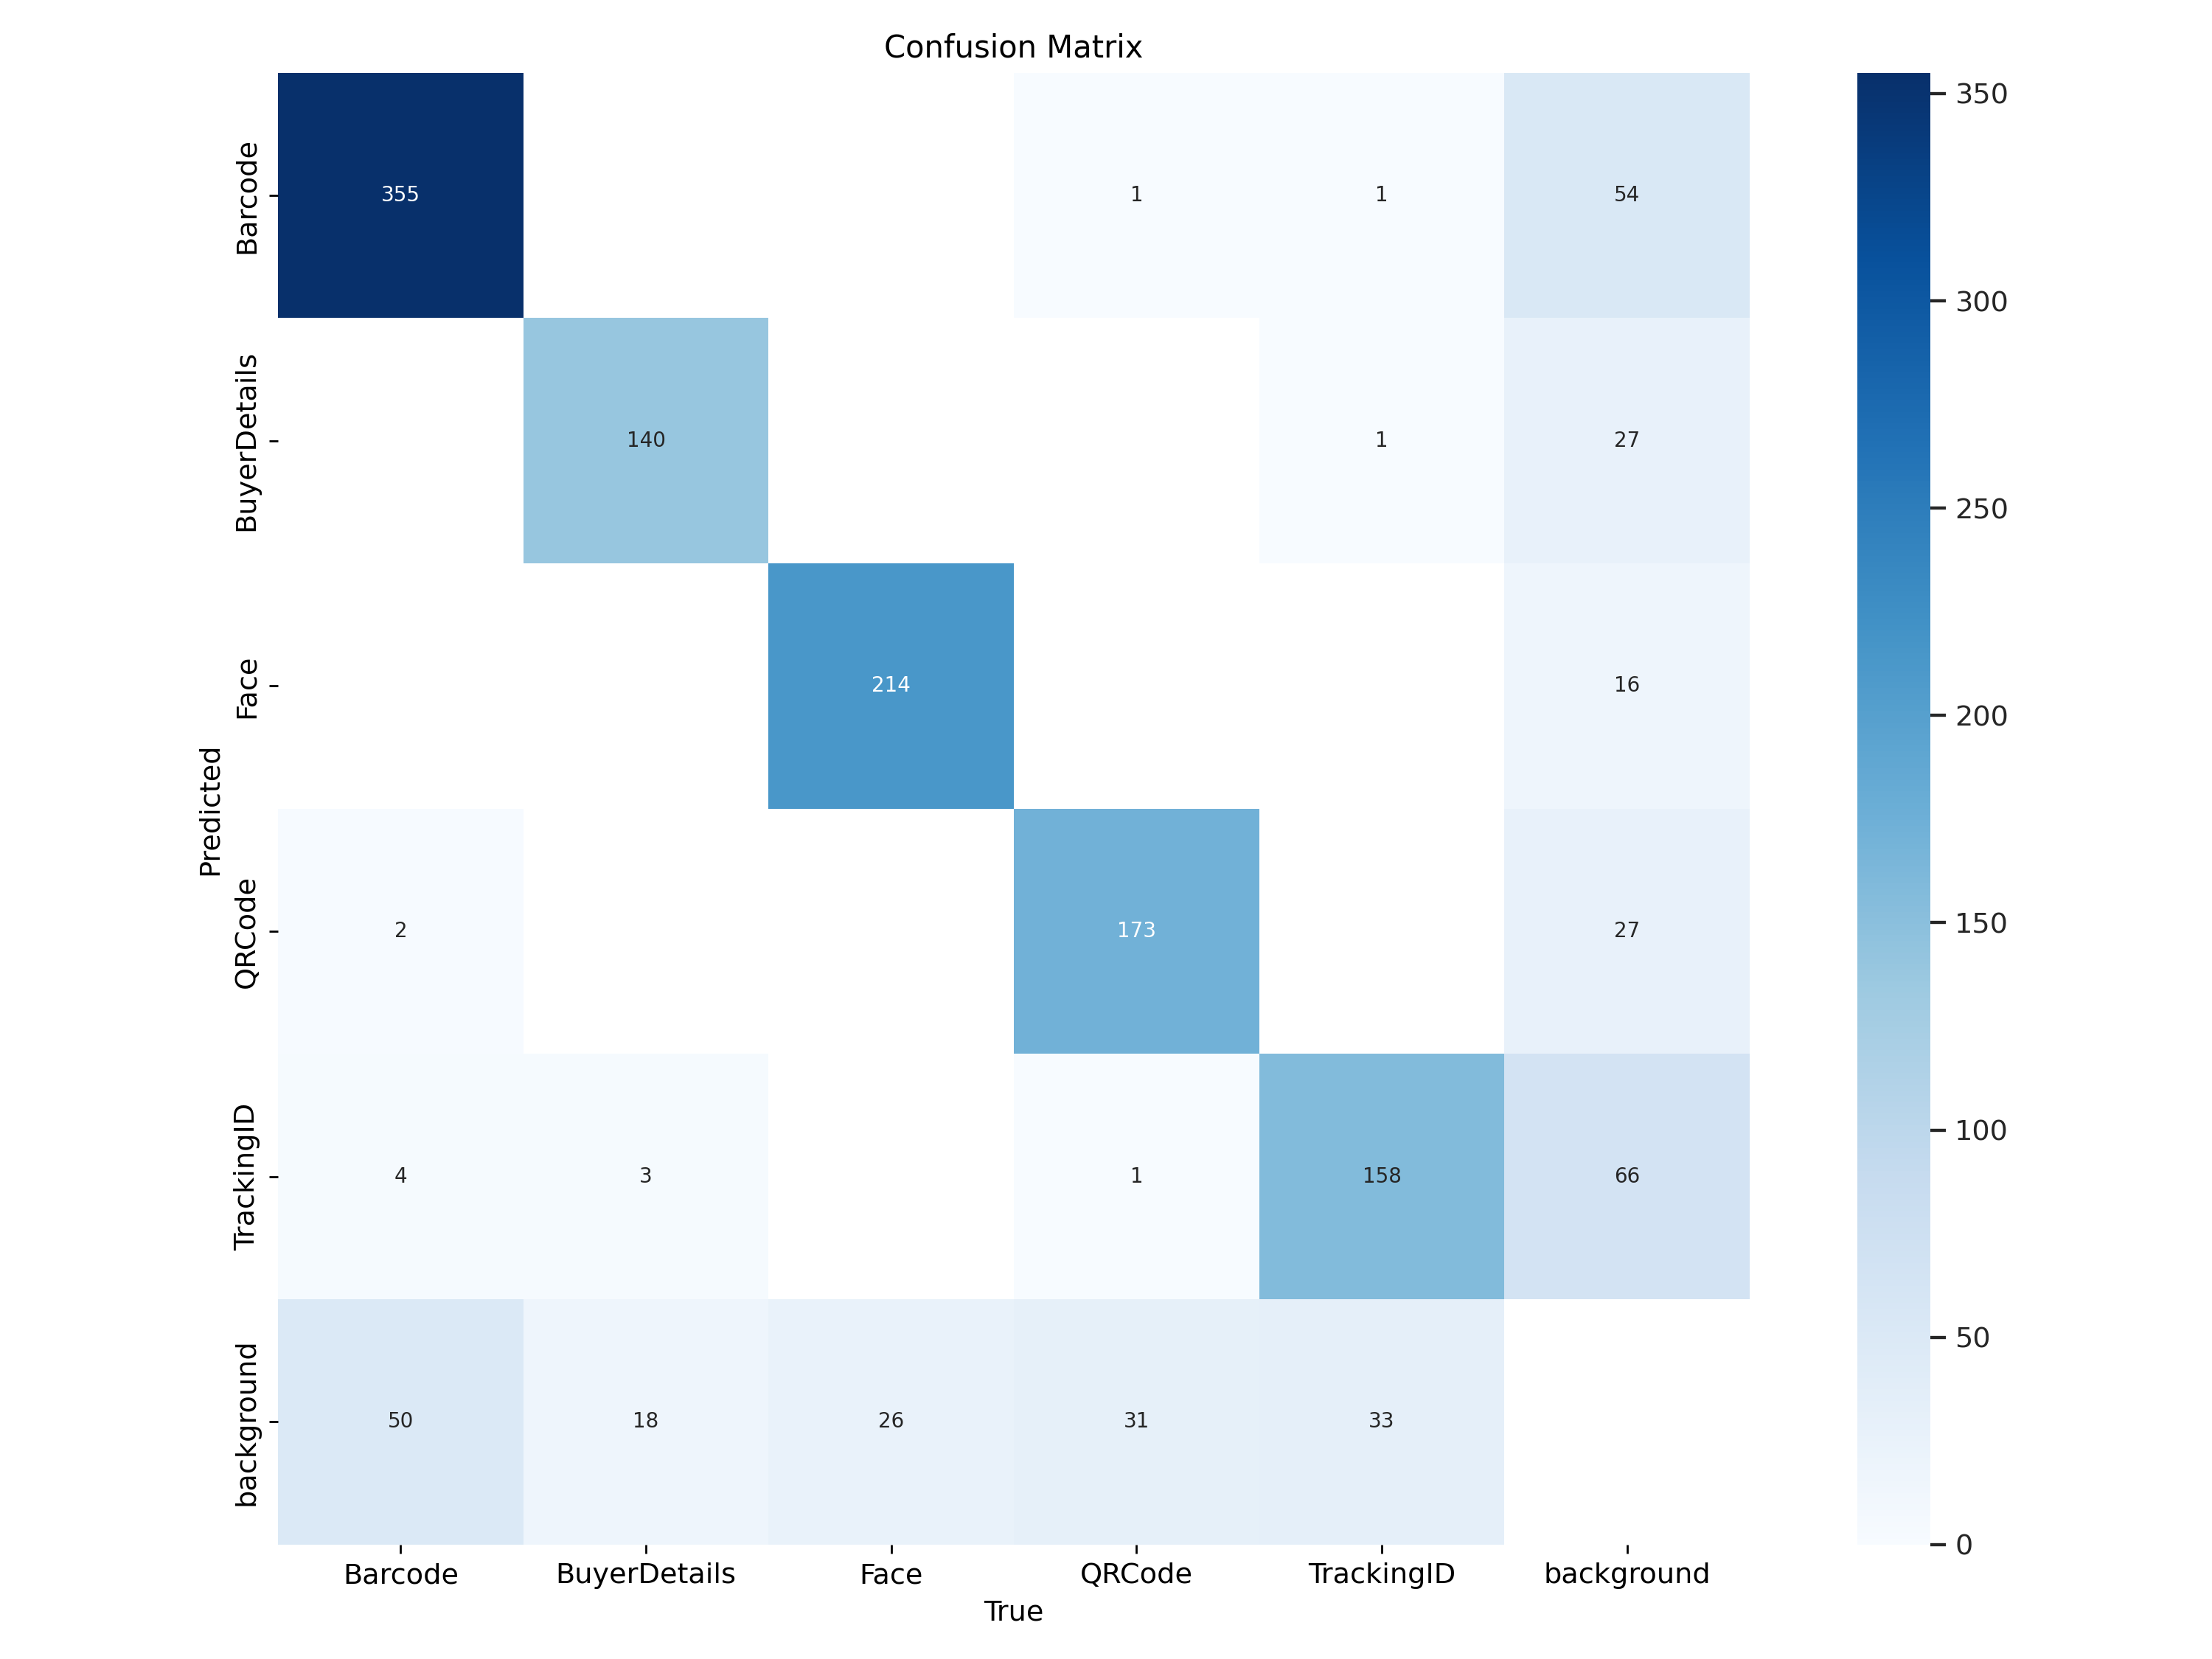

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

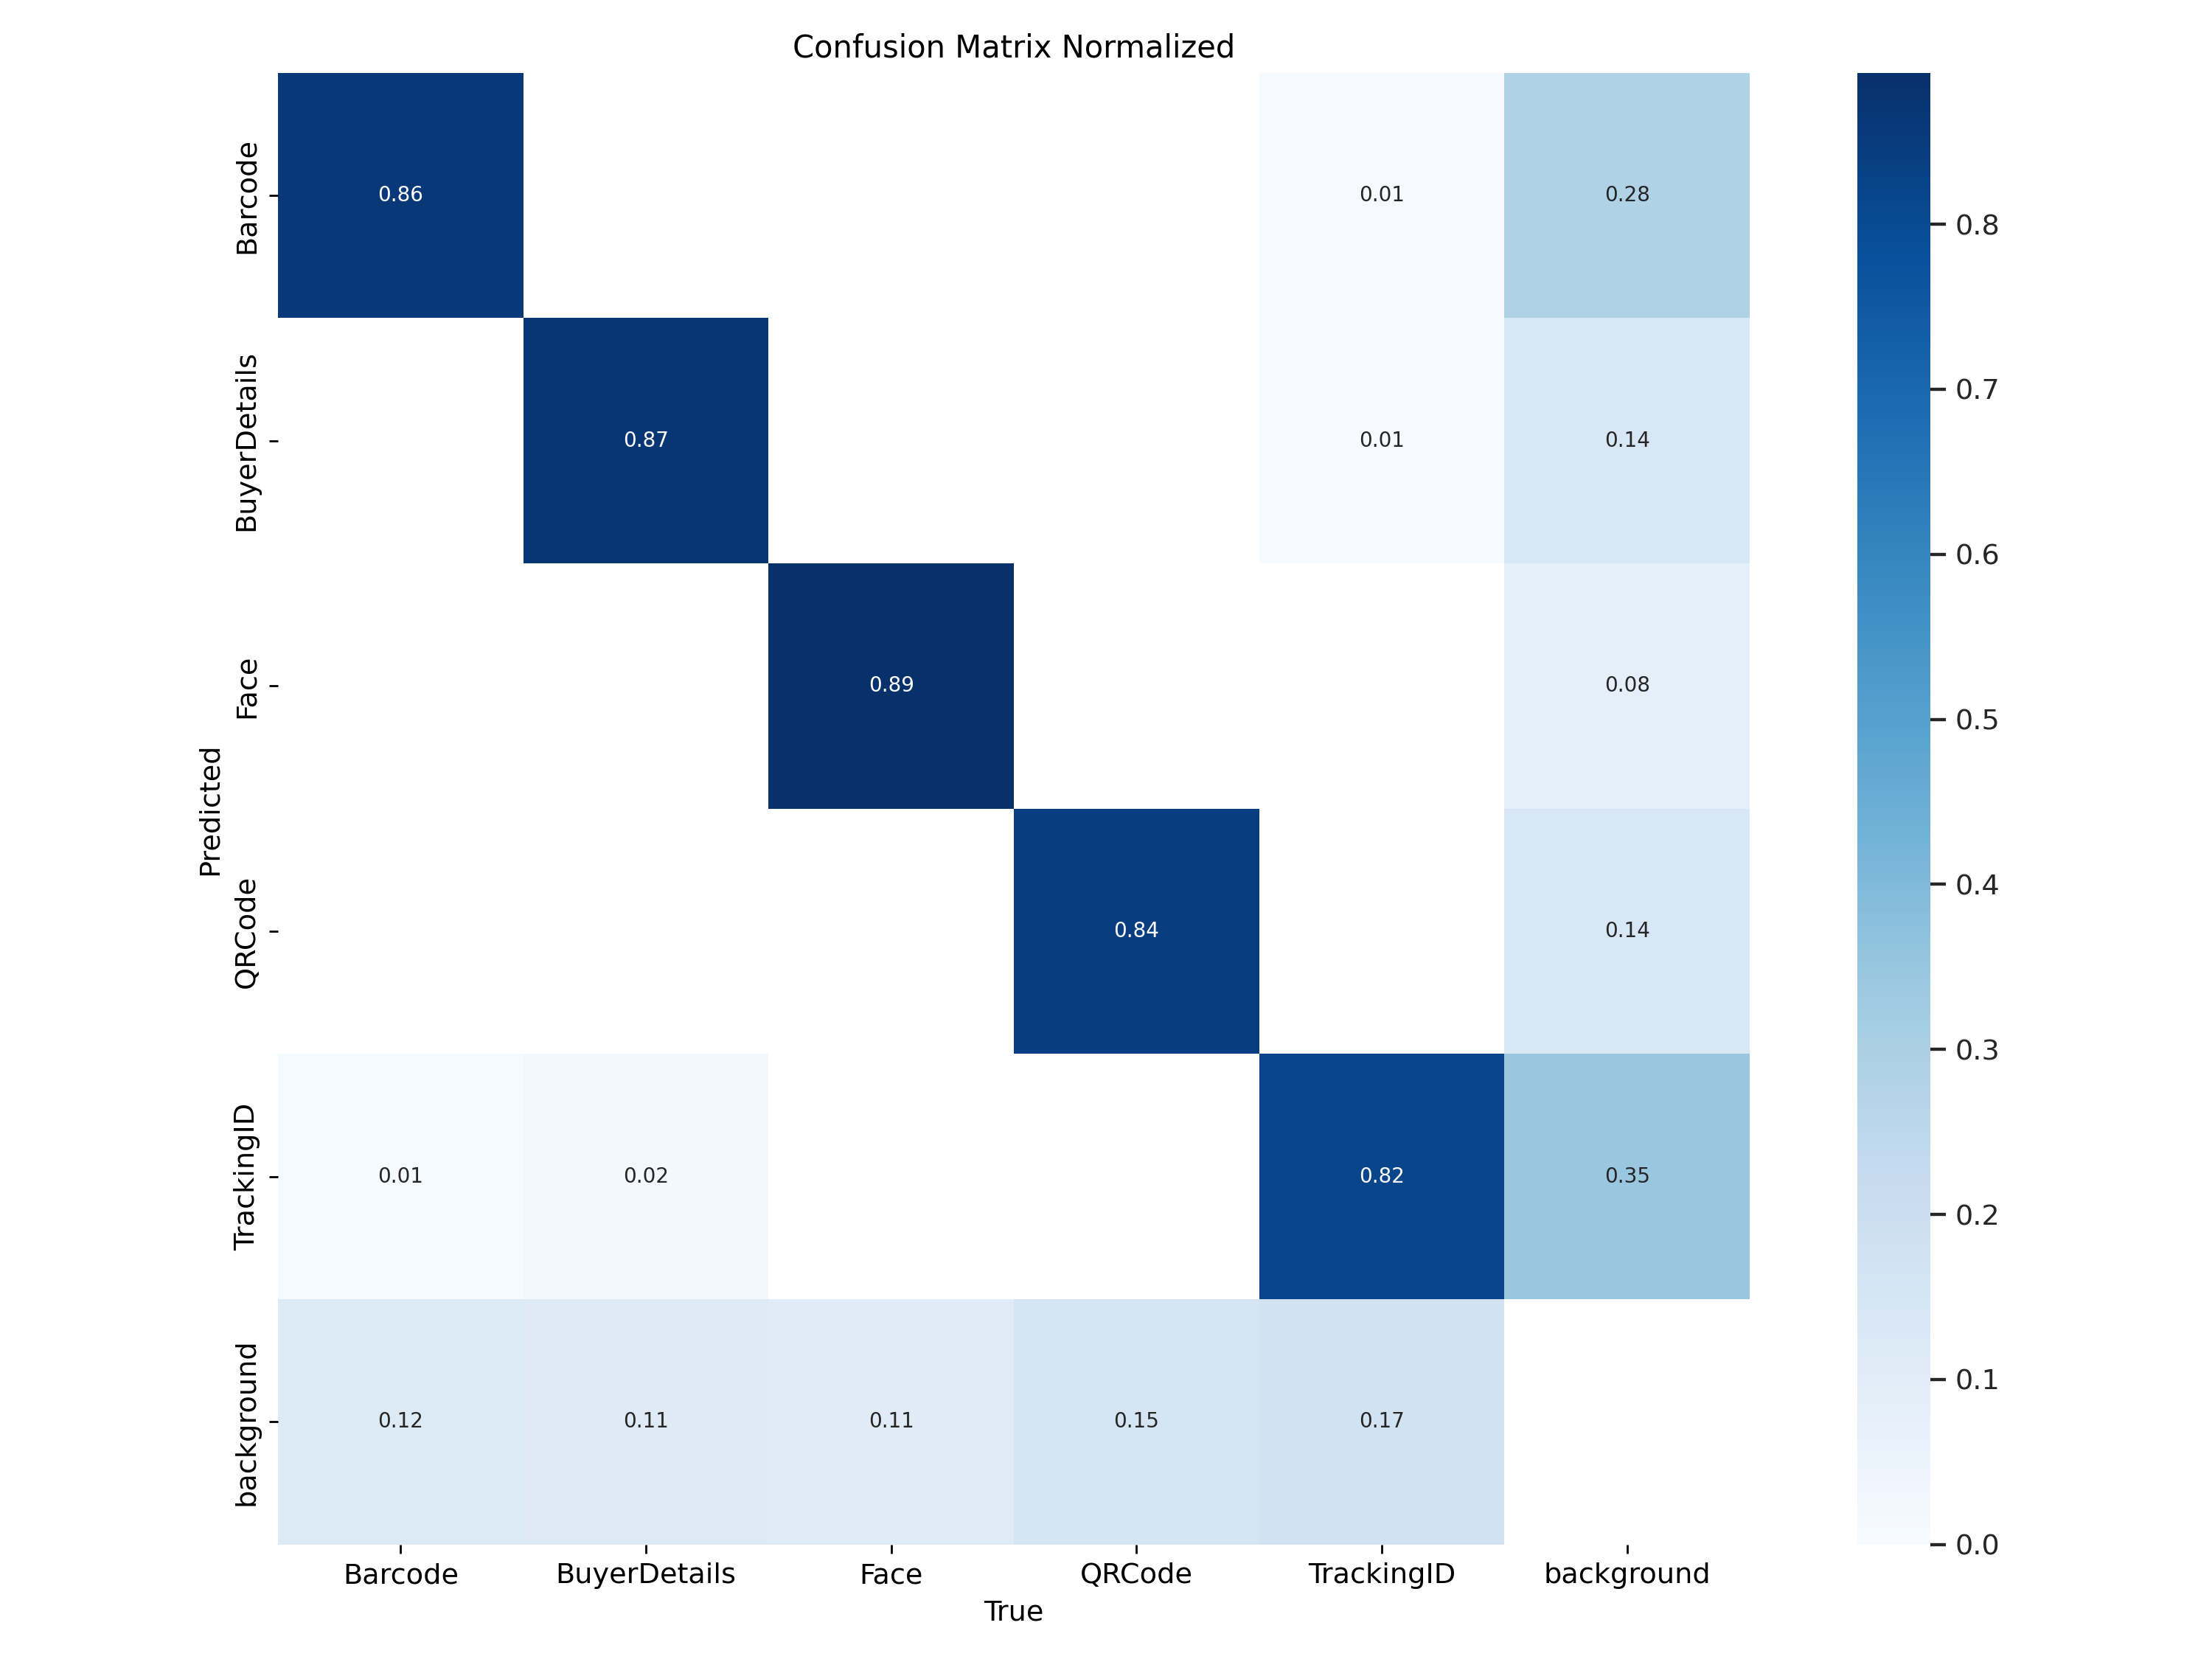

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

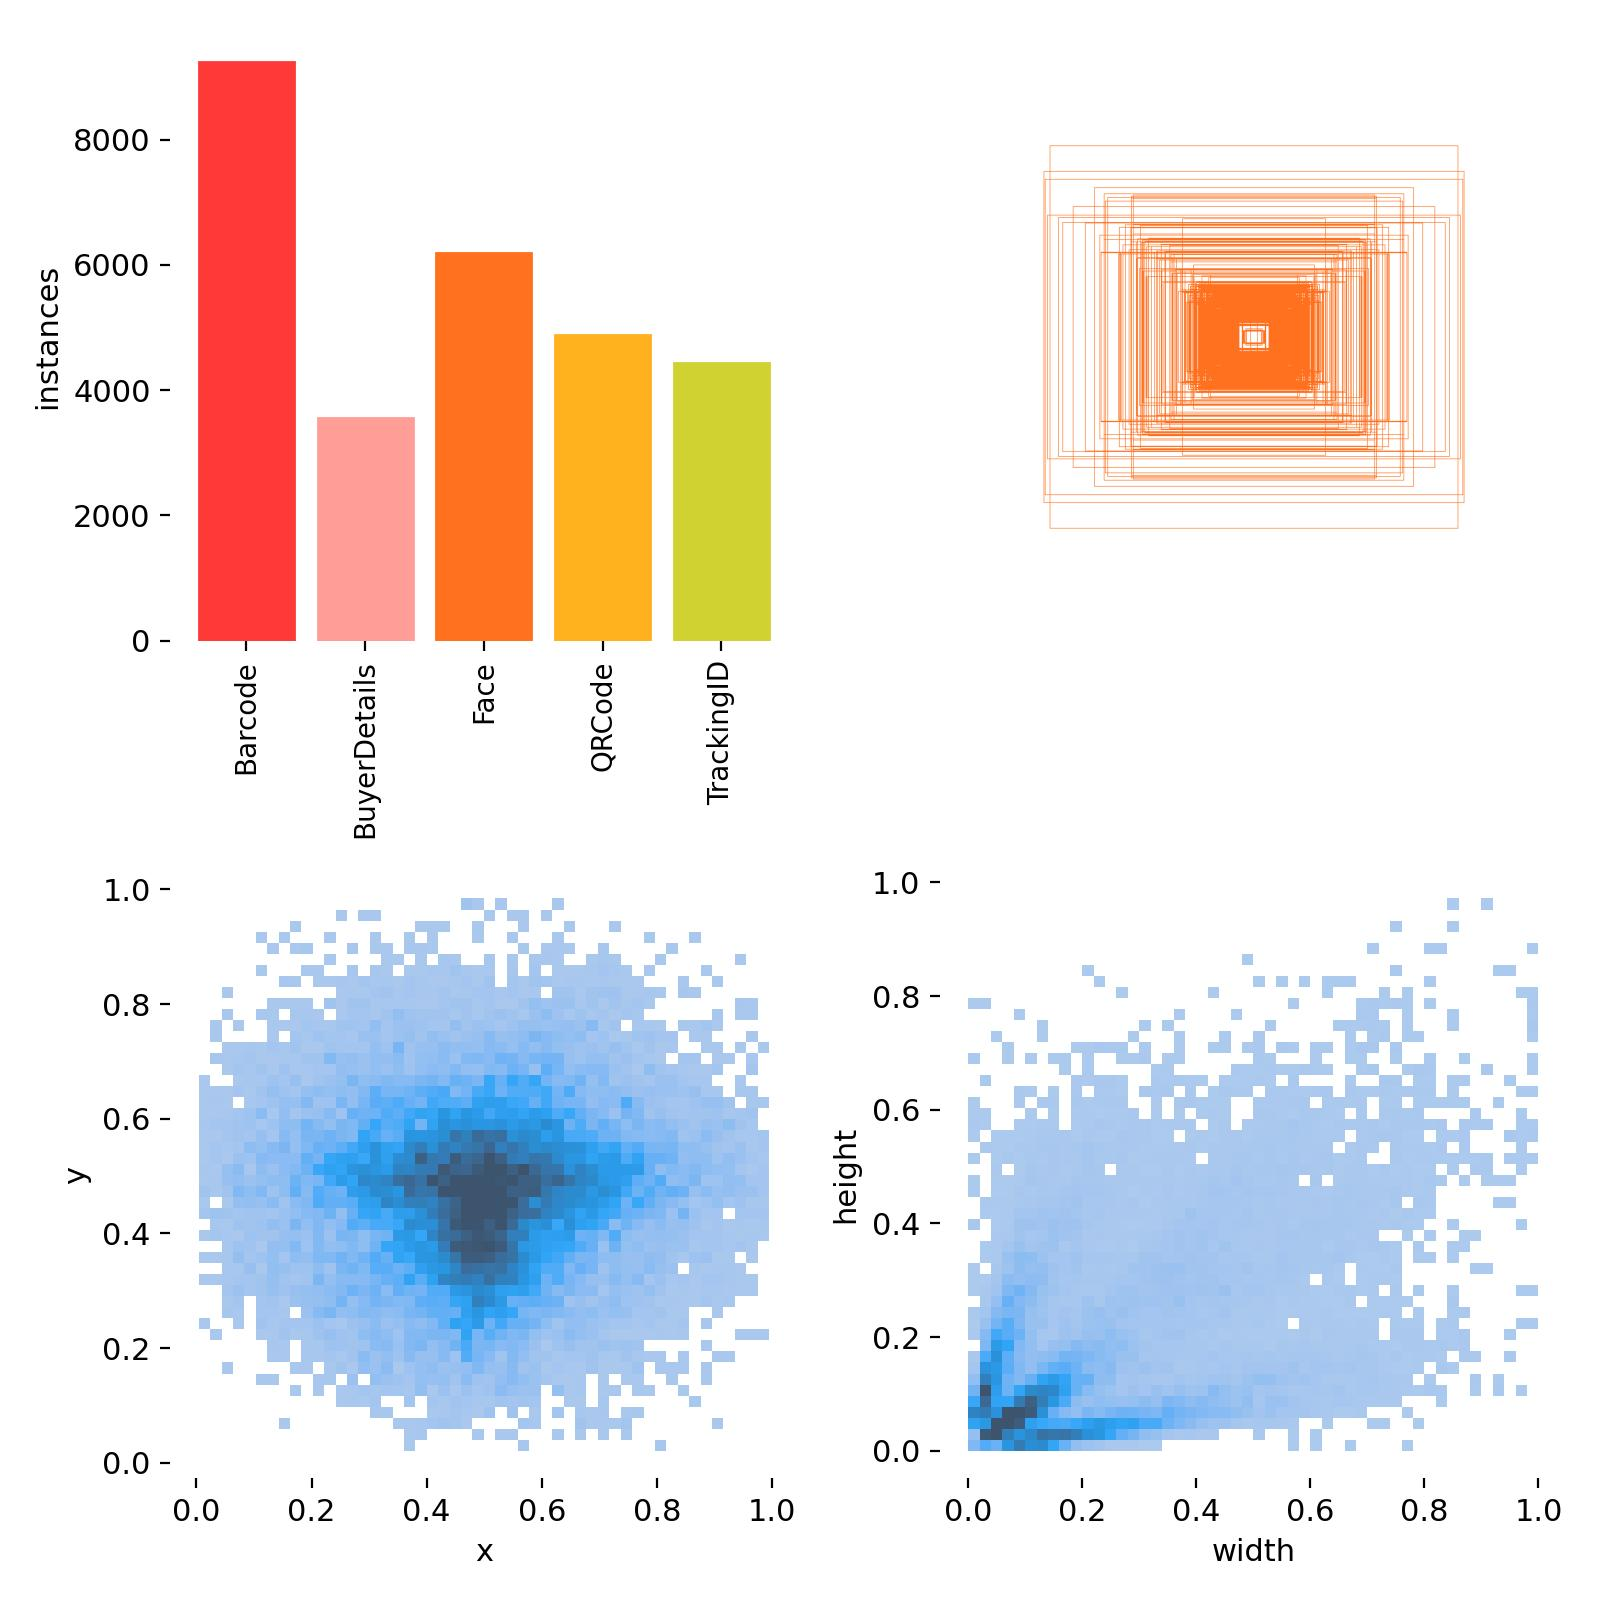

In [ ]:
Image(filename=f'/content/runs/detect/train/labels.jpg', width=600)

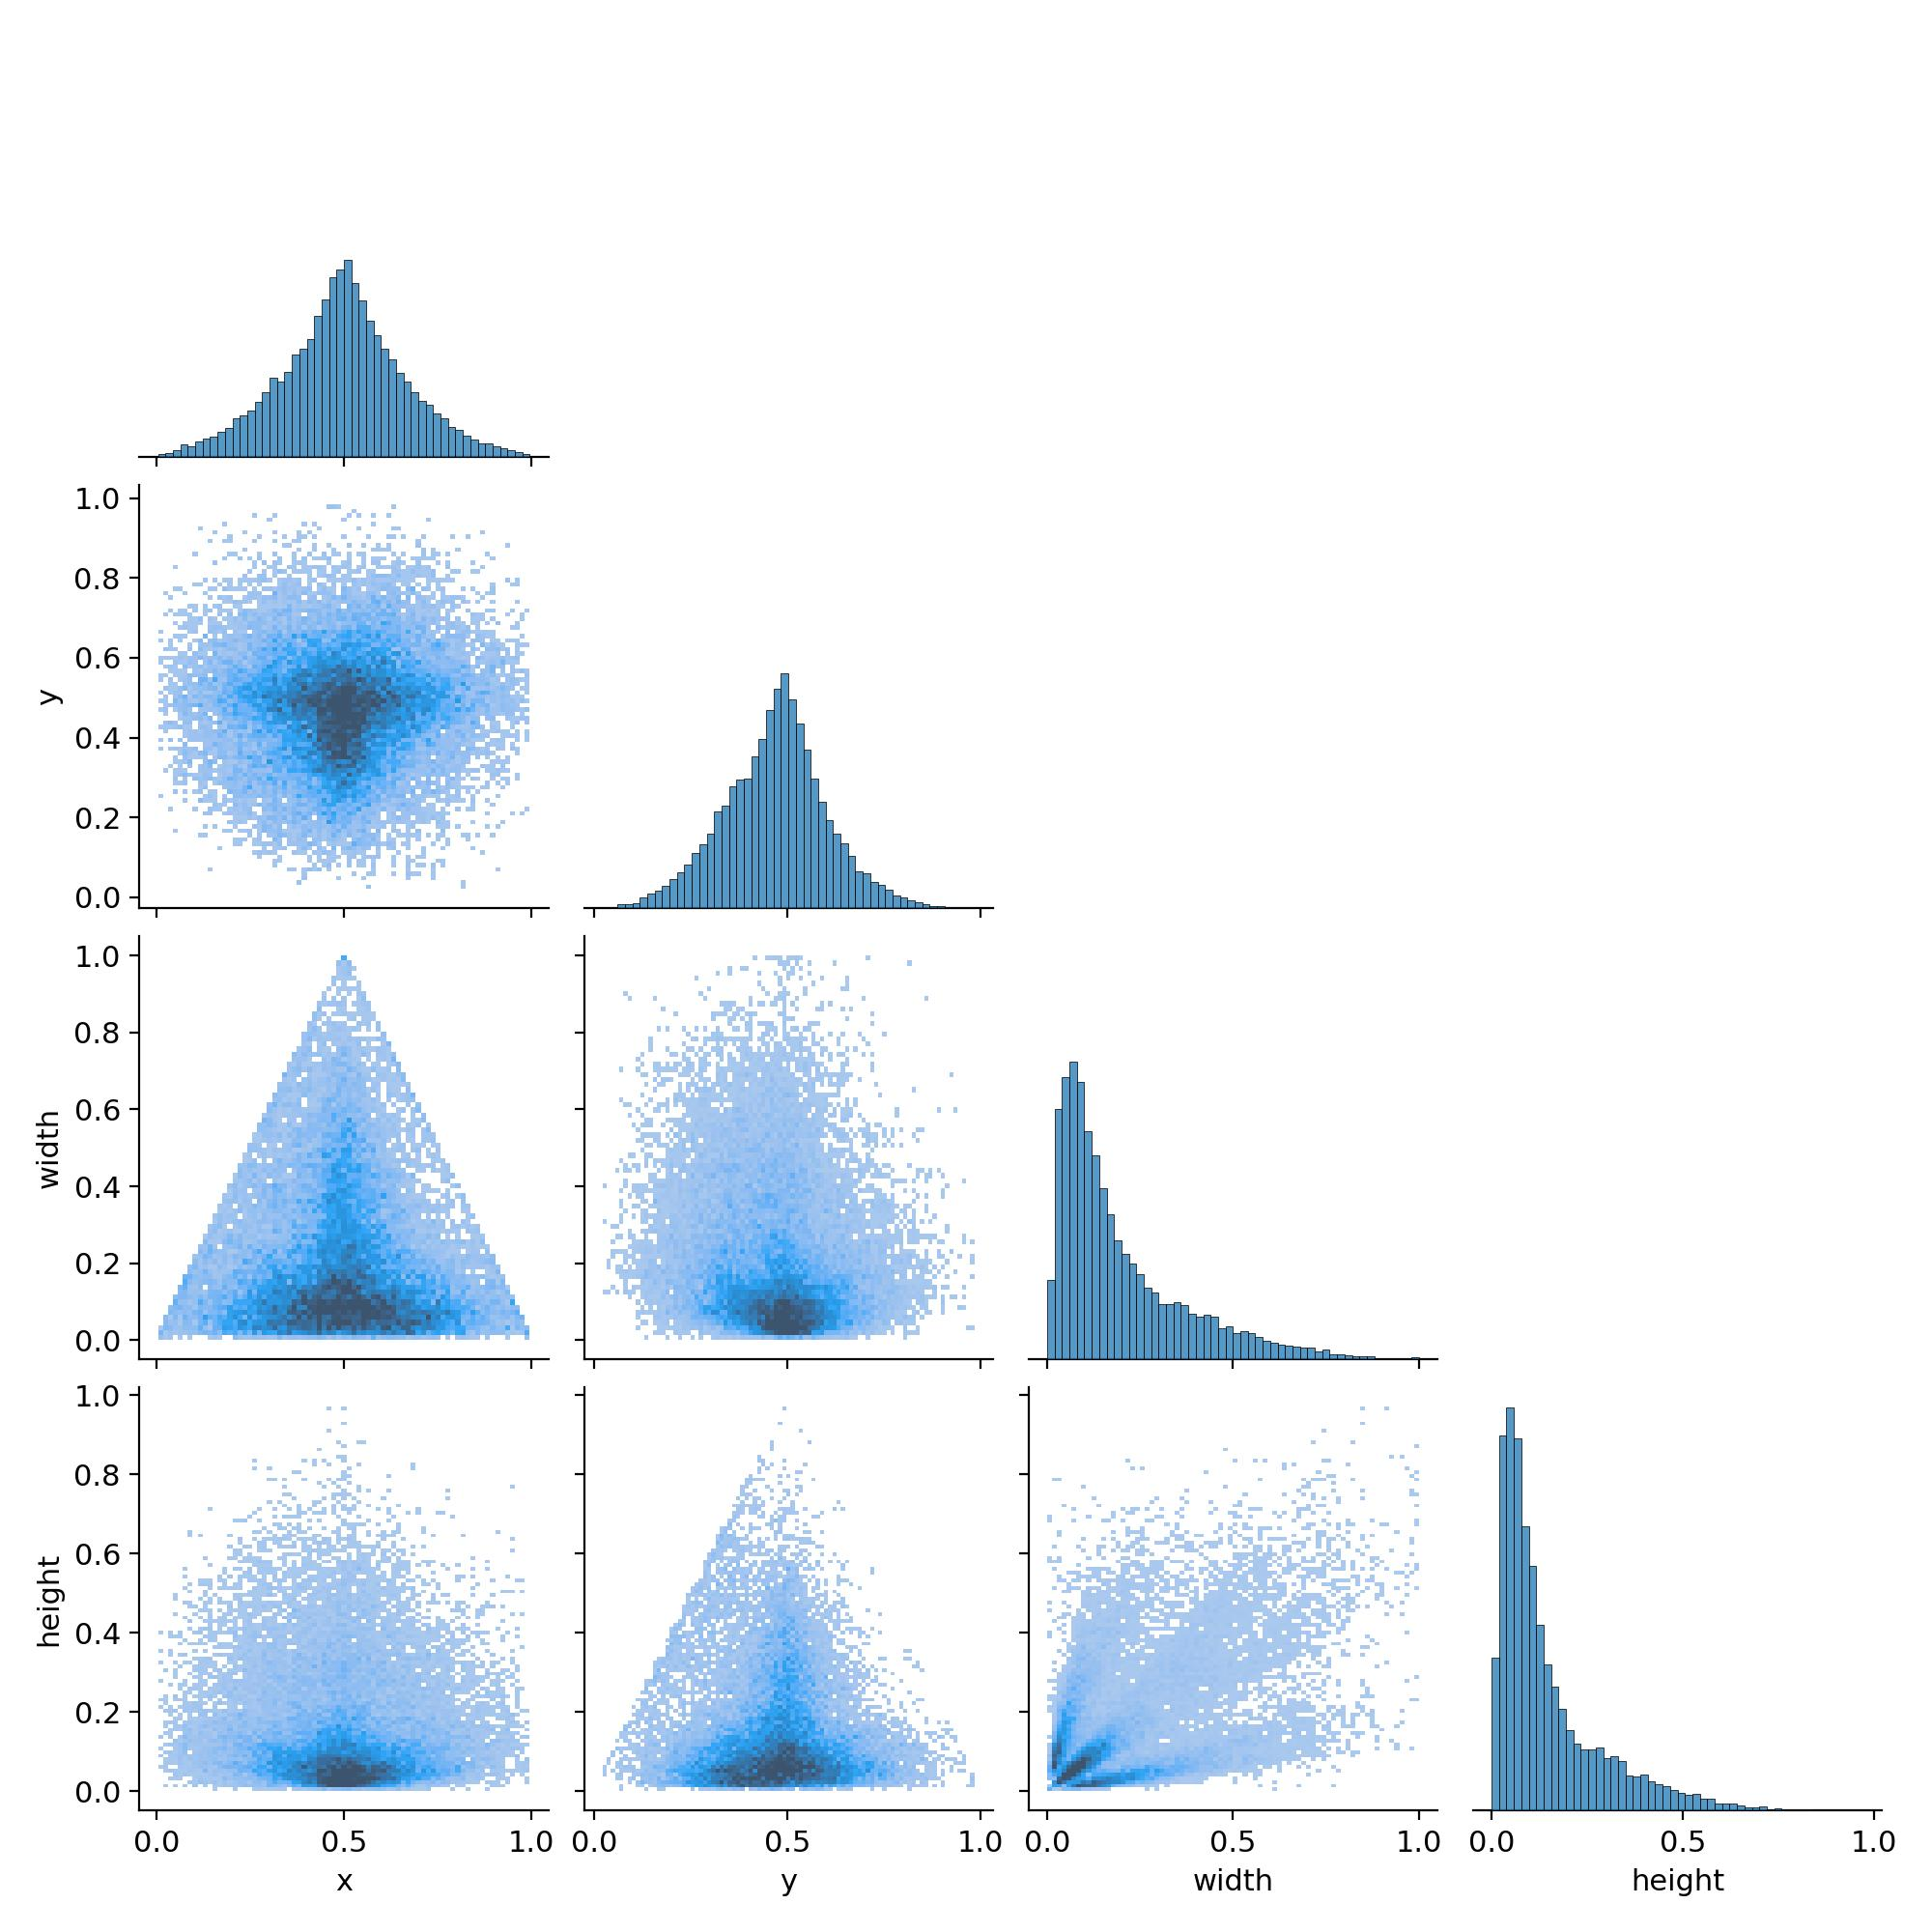

In [ ]:
Image(filename=f'/content/runs/detect/train/labels_correlogram.jpg', width=600)

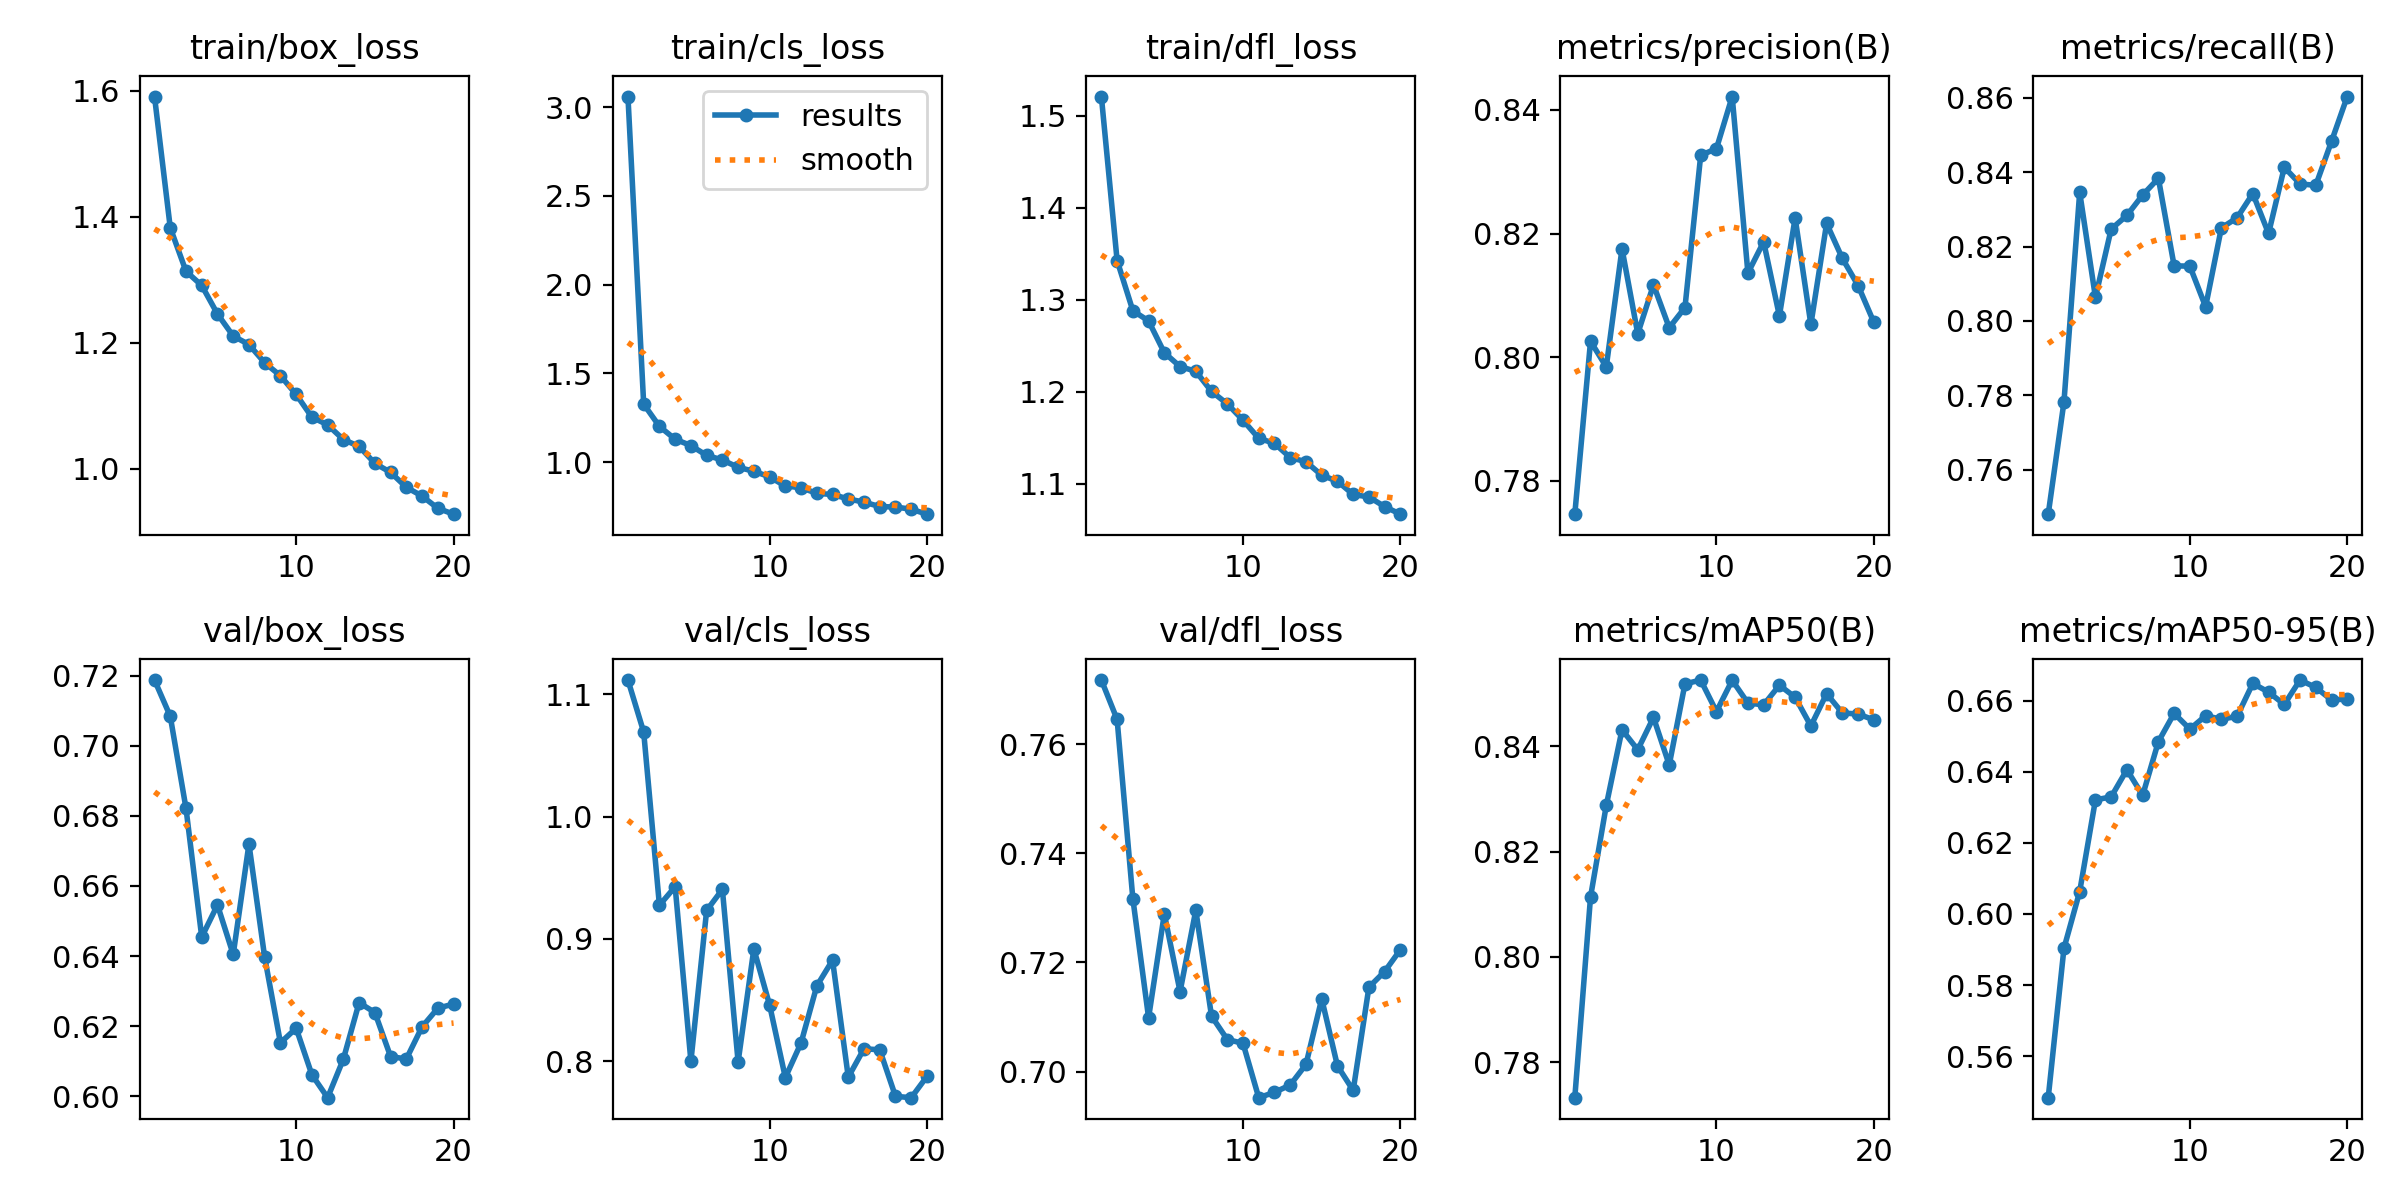

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

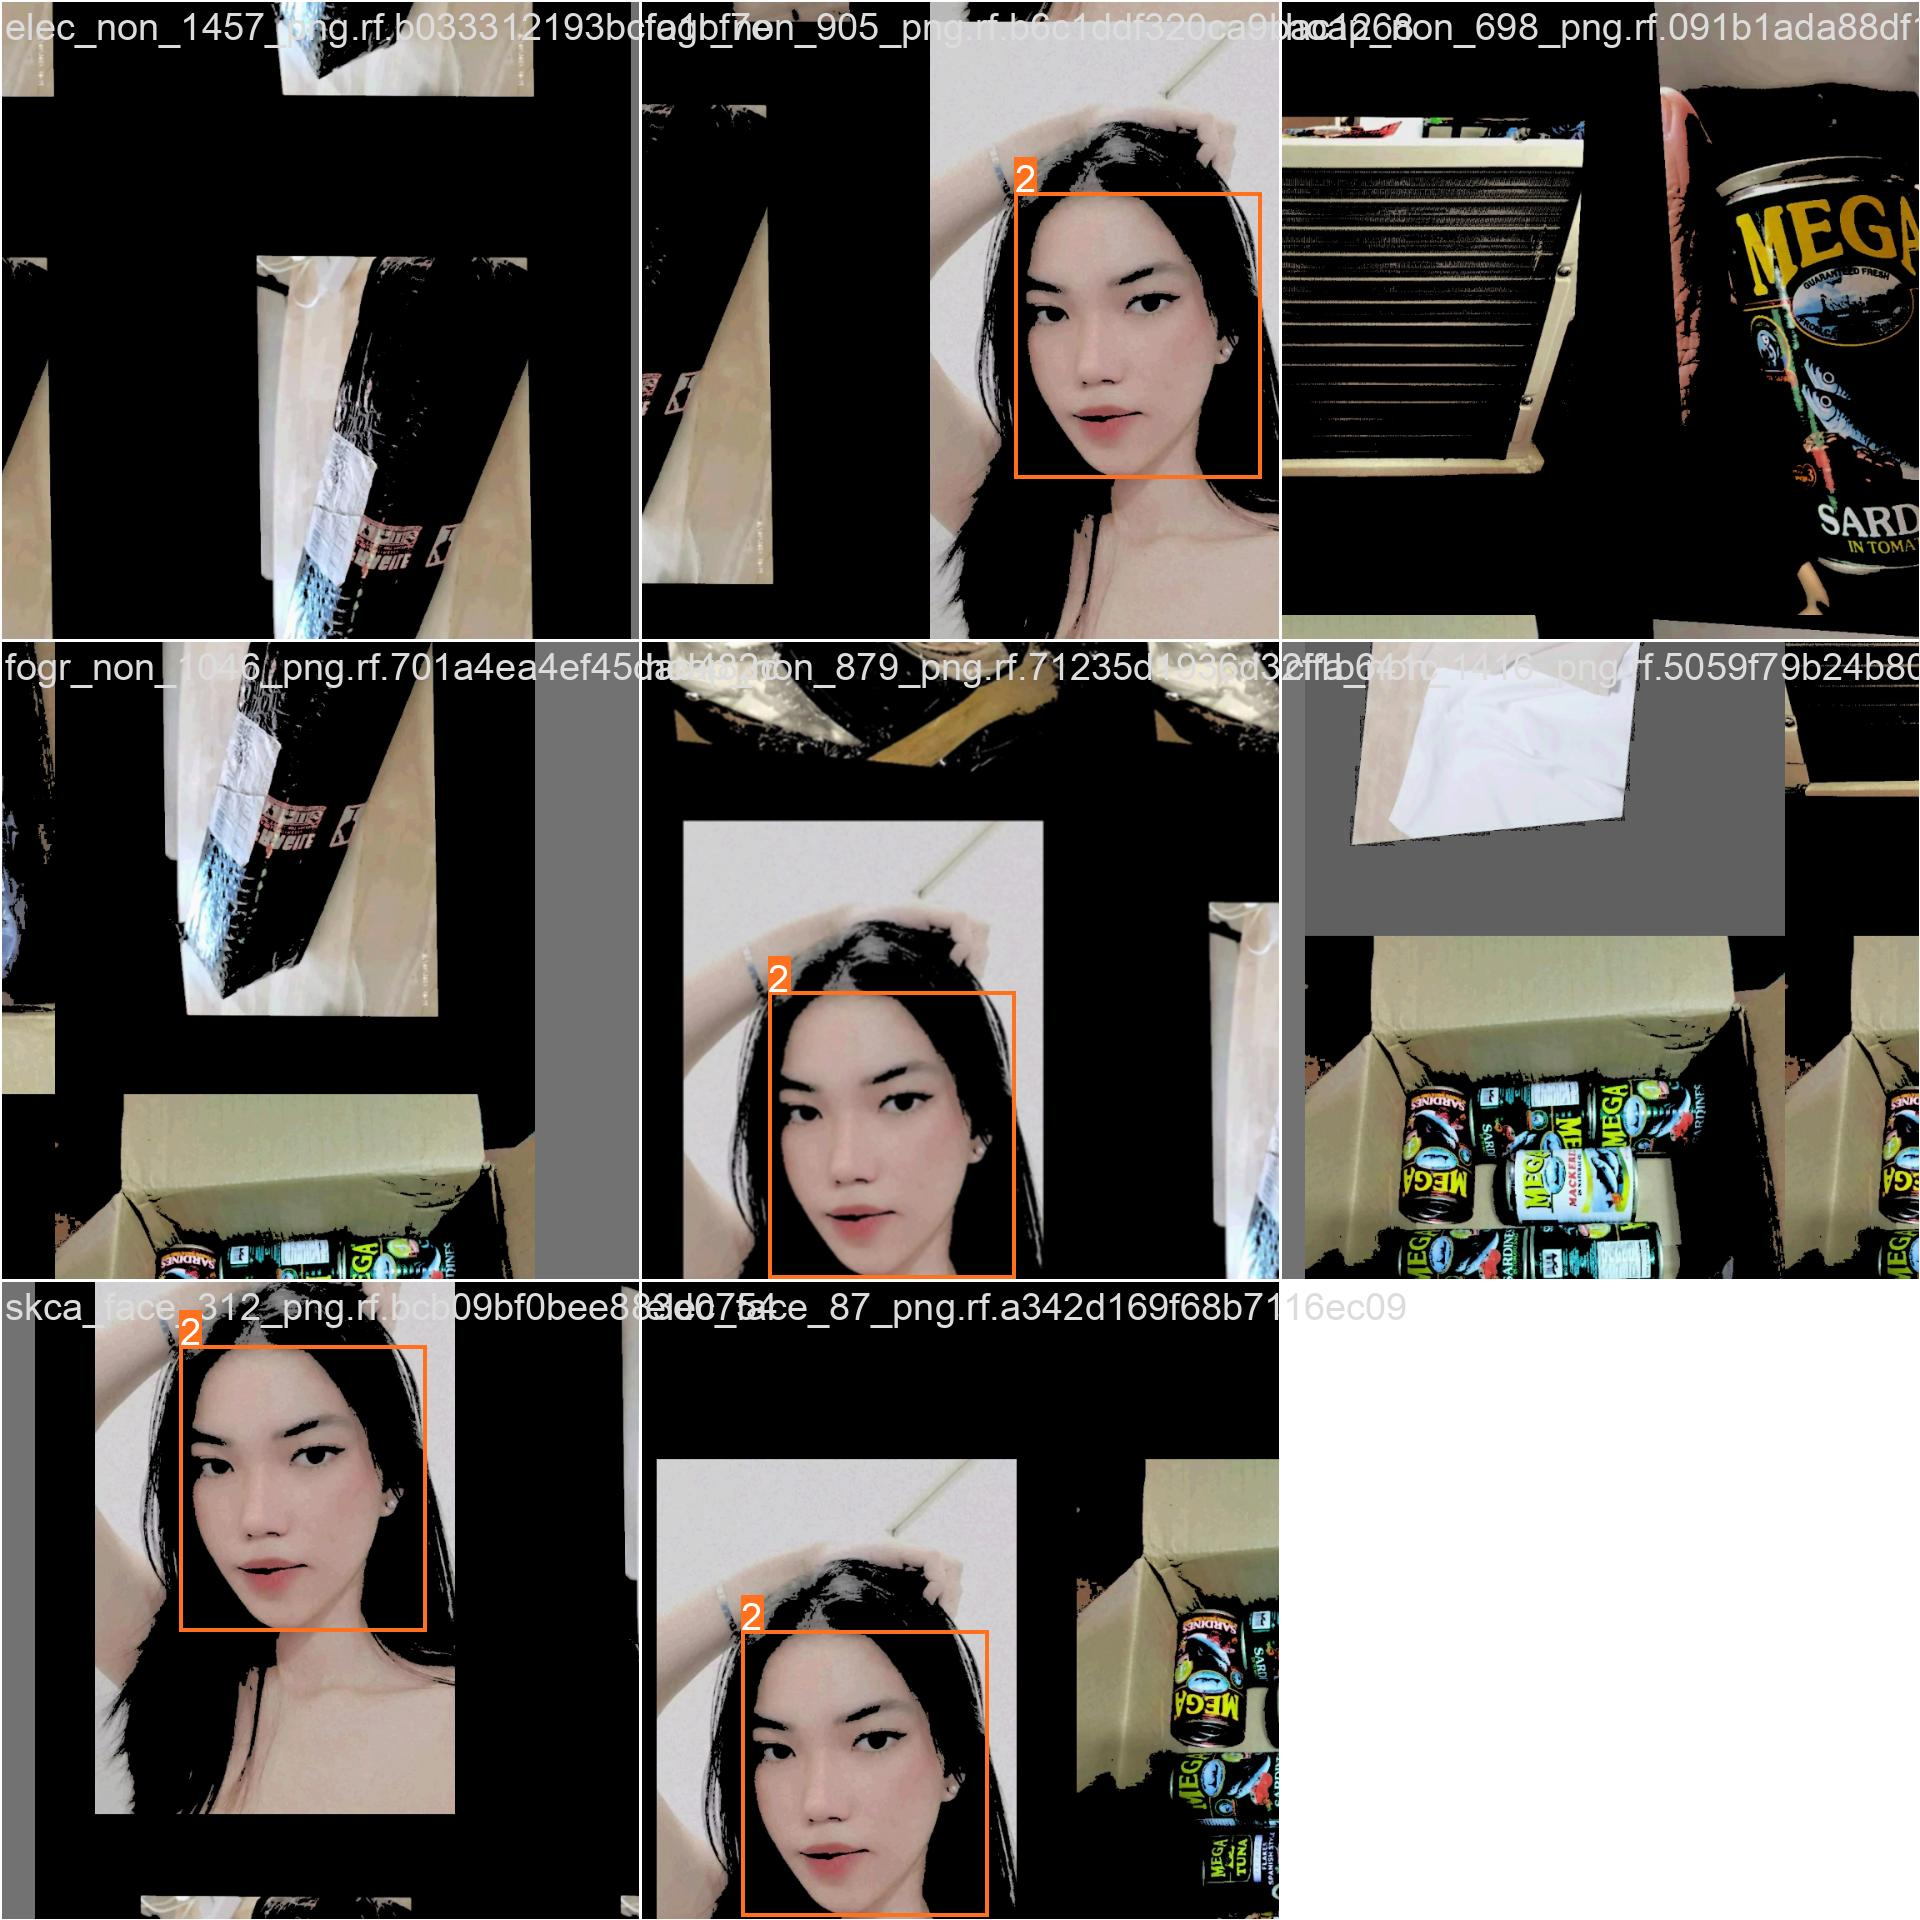

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

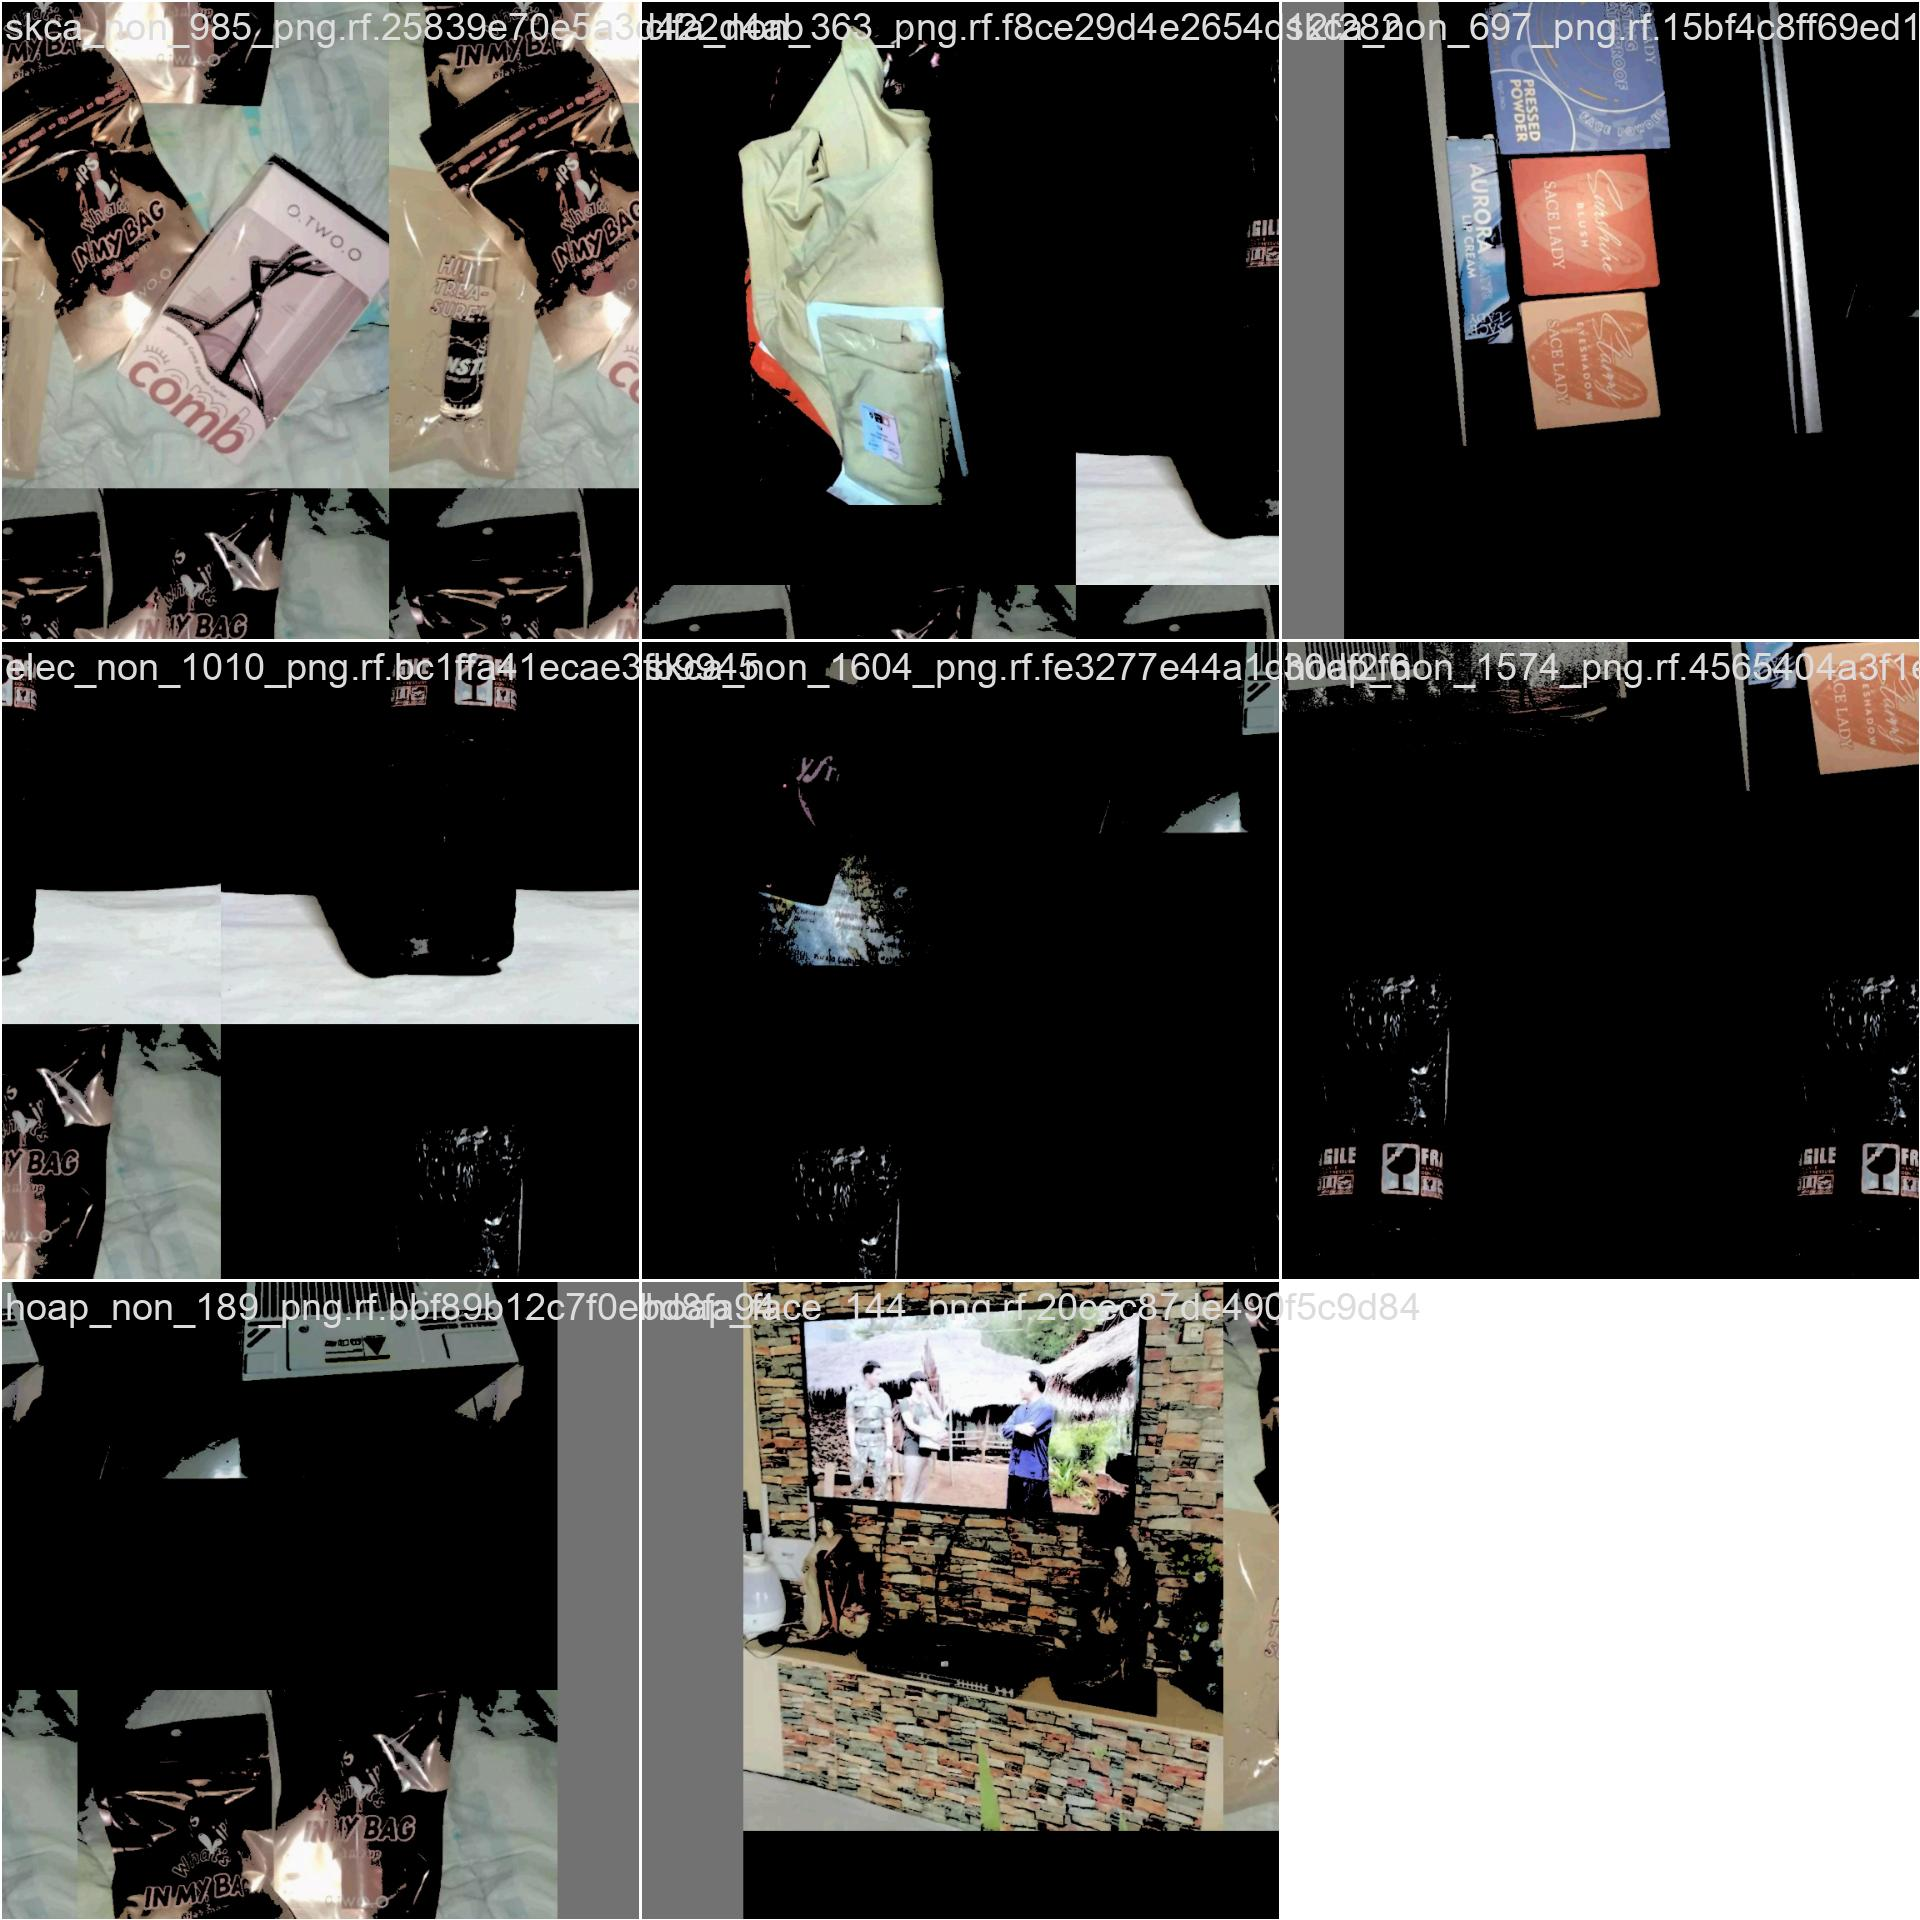

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch1.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch5010.jpg', width=600)

FileNotFoundError: ignored

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch5011.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch5012.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_labels.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch2_labels.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
model_path = '/content/runs/detect/train/weights'
data_yaml_path = '/content/YOLOV8Dataset.downsample/data.yaml'

model.val(data=data_yaml_path)

In [ ]:
import subprocess

# Define the YOLO command
yolo_command = 'yolo task=detect mode=export model=/content/runs/detect/train/weights/best.pt format=onnx simplify=True opset=13 imgsz=768'

# Run the YOLO command using subprocess
process = subprocess.Popen(yolo_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = process.communicate()

# Print the command output
print("Standard Output:")
print(stdout.decode())
print("Standard Error:")
print(stderr.decode())


Standard Output:
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 768, 768) BCHW and output shape(s) (1, 9, 12096) (49.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxsim>=0.4.33', 'onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 125.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 228.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 272.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 261.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 288.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.5s, installed 3 packages: ['onnx>=1.12.0', 'onnxsim>=0.4.33', 'onnxruntime']
requirements: ⚠️ R

Converting the Weights to NCNN Format

https://convertmodel.com/

In [ ]:
import shutil

# Compress the folder using shutil.make_archive
shutil.make_archive("/content/runs", 'zip', "/content", "runs")

# Move the compressed file to the correct location
shutil.move("/content/runs.zip", "/content/runs1.zip")

# Download the zip file
from google.colab import files
files.download("/content/runs1.zip")
